# EDA Report – IoT Sensor Data

## Load and overview

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

path_file = Path.cwd().parent / Path("data/merged_data")
# path_file = Path.cwd().parent / Path("data/processed_data")

sensors_to_explore = [
    # 'value_PM2.5',
    'value_Luftfeuchte',
    # 'value_UV-Intensität',
    # 'value_PM10',
    'value_Lautstärke',
    'value_Temperatur',
    # 'value_Beleuchtungsstärke'
       ]
stations_to_explore = [
    'home_Klinga',
    'Stadtteilbüro_Siemensstadt',
    'Station_Kaiser',
    'PANGAEAs_SenseBox',
    "SCOE",
    "Lake_Barmen",
    "Schnus_Sense_Box"
       ]

n_rows = len(sensors_to_explore)
n_cols = len(stations_to_explore)

dataframes = {}

for file_path in path_file.iterdir():
    file_name = str(file_path.name.split(".")[0])

    if file_name not in stations_to_explore:
        continue

    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.sort_values('timestamp')
    df.set_index('timestamp', inplace=True)
    dataframes[file_name] = df


In [ ]:
for name, df in dataframes.items():
    total_cells = df.size
    missing_cells = df.isnull().sum().sum()
    percent_missing = (missing_cells / total_cells) * 100
    
    print(f"\n=== {name} ===")
    print("Shape:", df.shape)
    print("Missing values per column:")
    print(df.isnull().sum())
    print("Total missing values:", missing_cells)
    print(f"{name}: {missing_cells} missing ({percent_missing:.2f}%) out of {total_cells}")



=== PANGAEAs_SenseBox ===
Shape: (43197, 7)
Missing values per column:
value_PM2.5                 735
value_Luftfeuchte           735
value_UV-Intensität         735
value_PM10                  735
value_Lautstärke            735
value_Temperatur            735
value_Beleuchtungsstärke    735
dtype: int64
Total missing values: 5145
PANGAEAs_SenseBox: 5145 missing (1.70%) out of 302379

=== Station_Kaiser ===
Shape: (33780, 7)
Missing values per column:
value_PM2.5                 282
value_Luftfeuchte           282
value_UV-Intensität         282
value_PM10                  282
value_Lautstärke            282
value_Temperatur            282
value_Beleuchtungsstärke    282
dtype: int64
Total missing values: 1974
Station_Kaiser: 1974 missing (0.83%) out of 236460

=== home_Klinga ===
Shape: (43189, 7)
Missing values per column:
value_PM2.5                 8419
value_Luftfeuchte           8419
value_UV-Intensität         8419
value_PM10                  8419
value_Lautstärke            


PANGAEAs_SenseBox

value_PM2.5                 735
value_Luftfeuchte           735
value_UV-Intensität         735
value_PM10                  735
value_Lautstärke            735
value_Temperatur            735
value_Beleuchtungsstärke    735
dtype: int64


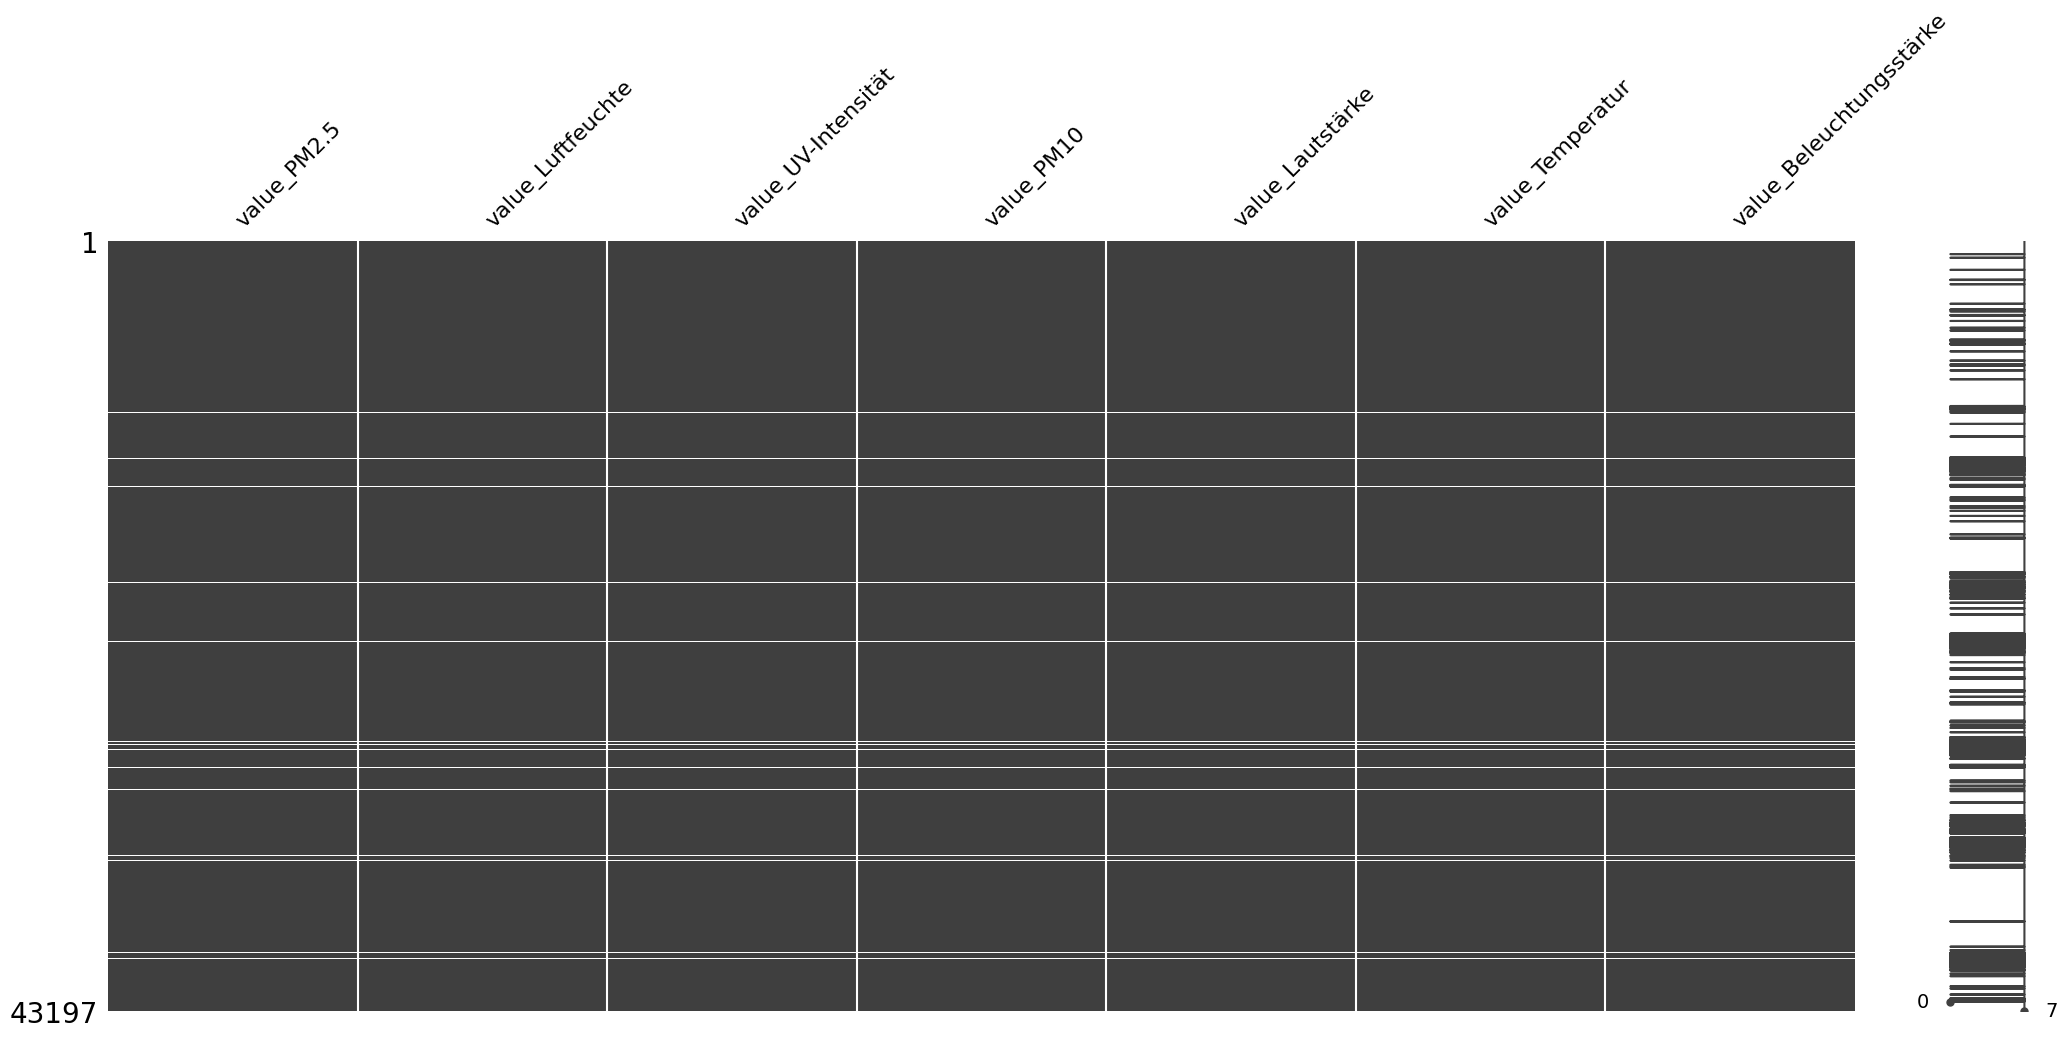


Station_Kaiser

value_PM2.5                 282
value_Luftfeuchte           282
value_UV-Intensität         282
value_PM10                  282
value_Lautstärke            282
value_Temperatur            282
value_Beleuchtungsstärke    282
dtype: int64


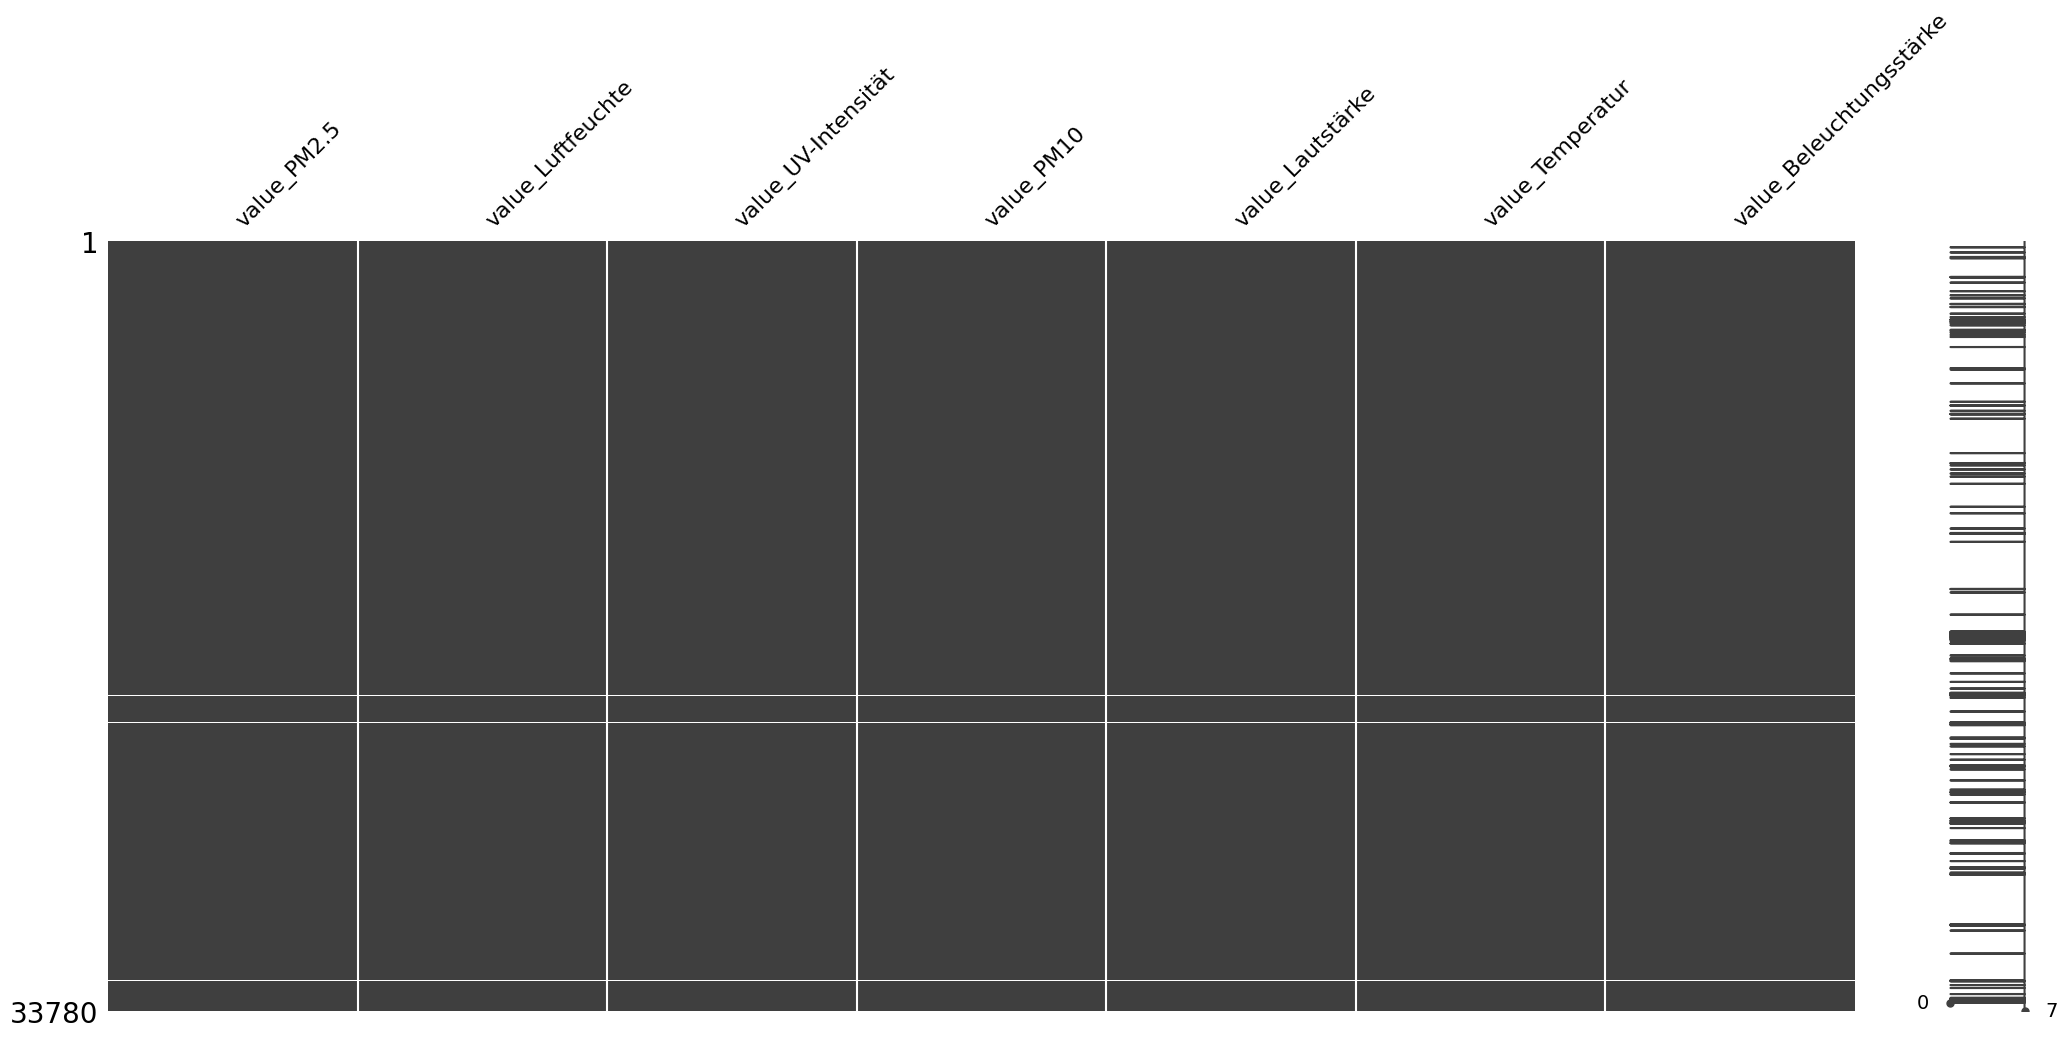


home_Klinga

value_PM2.5                 8419
value_Luftfeuchte           8419
value_UV-Intensität         8419
value_PM10                  8419
value_Lautstärke            8419
value_Temperatur            8419
value_Beleuchtungsstärke    8419
dtype: int64


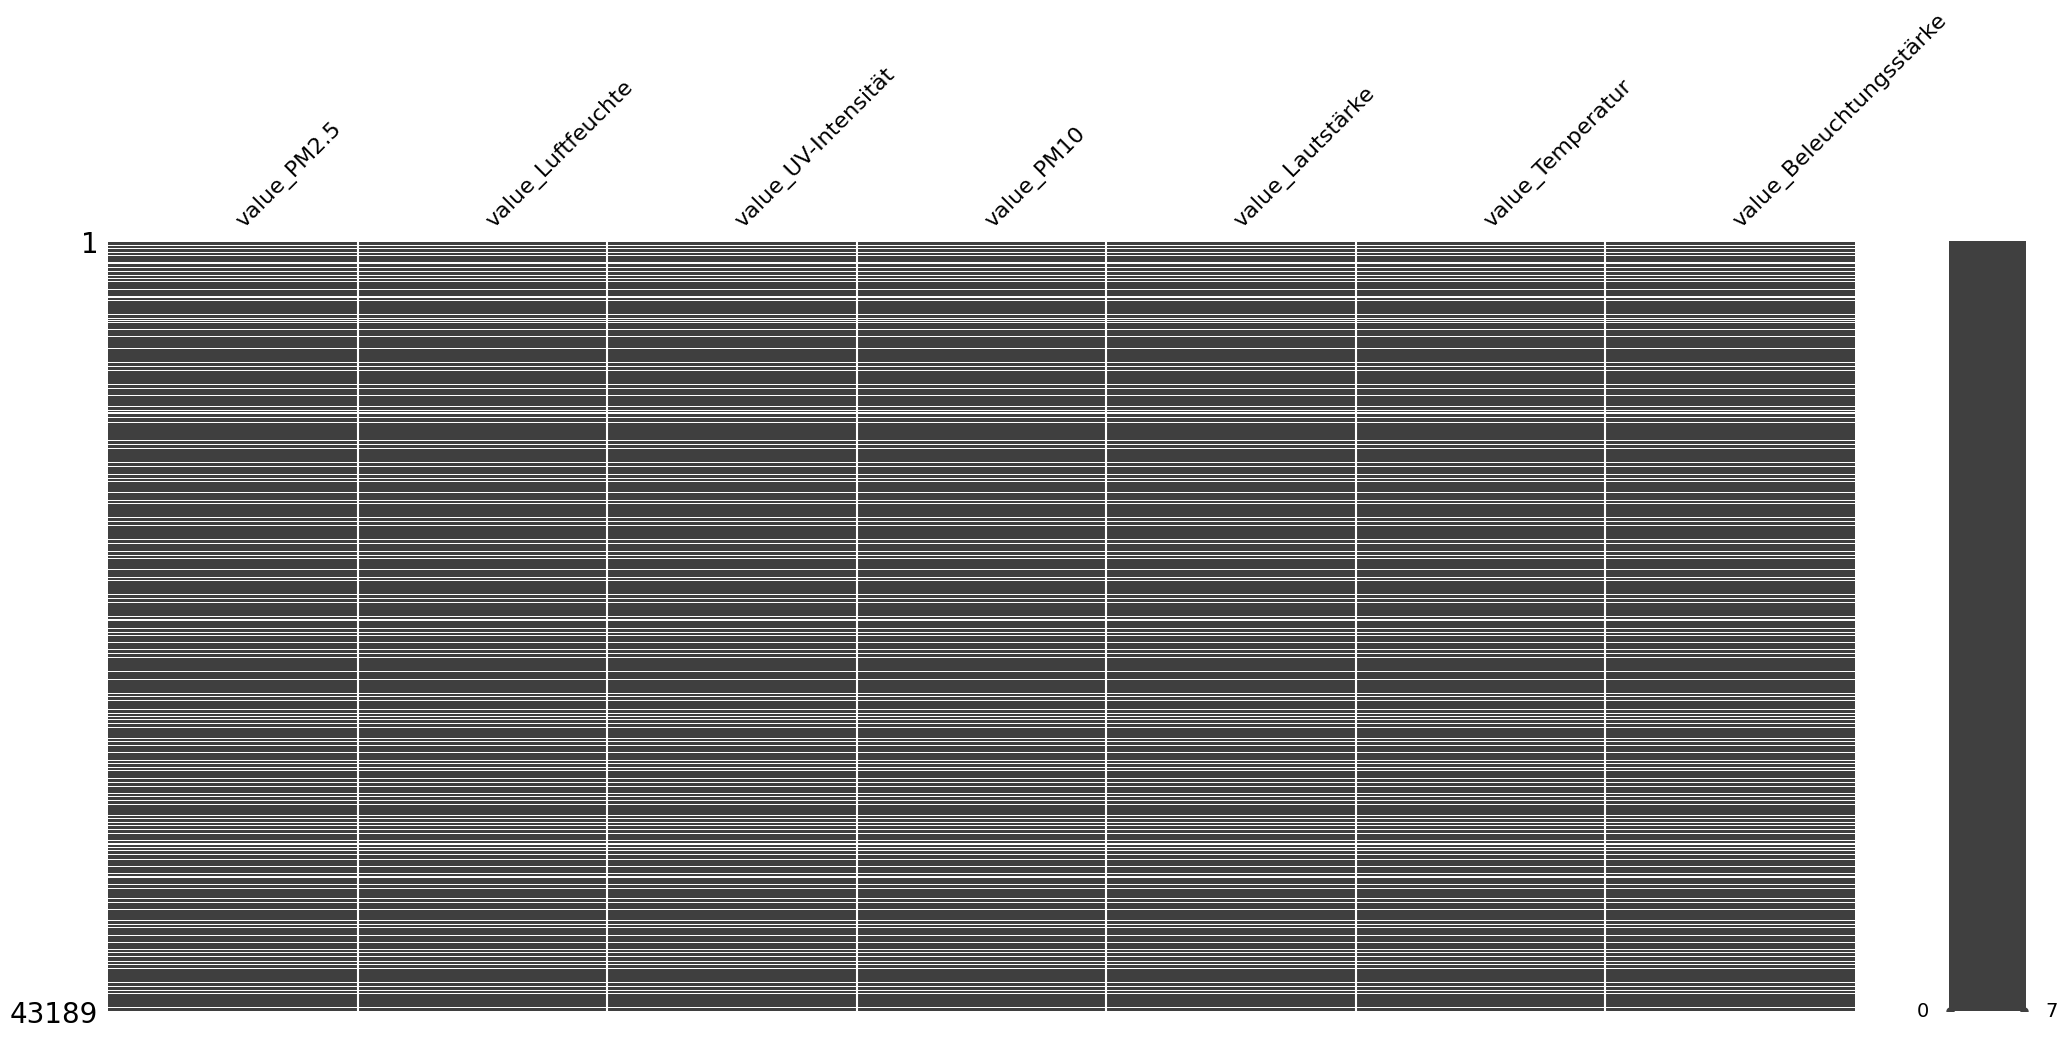


SCOE

value_PM2.5                 9435
value_Luftfeuchte           9435
value_UV-Intensität         9435
value_PM10                  9435
value_Lautstärke            9435
value_Temperatur            9435
value_Beleuchtungsstärke    9435
dtype: int64


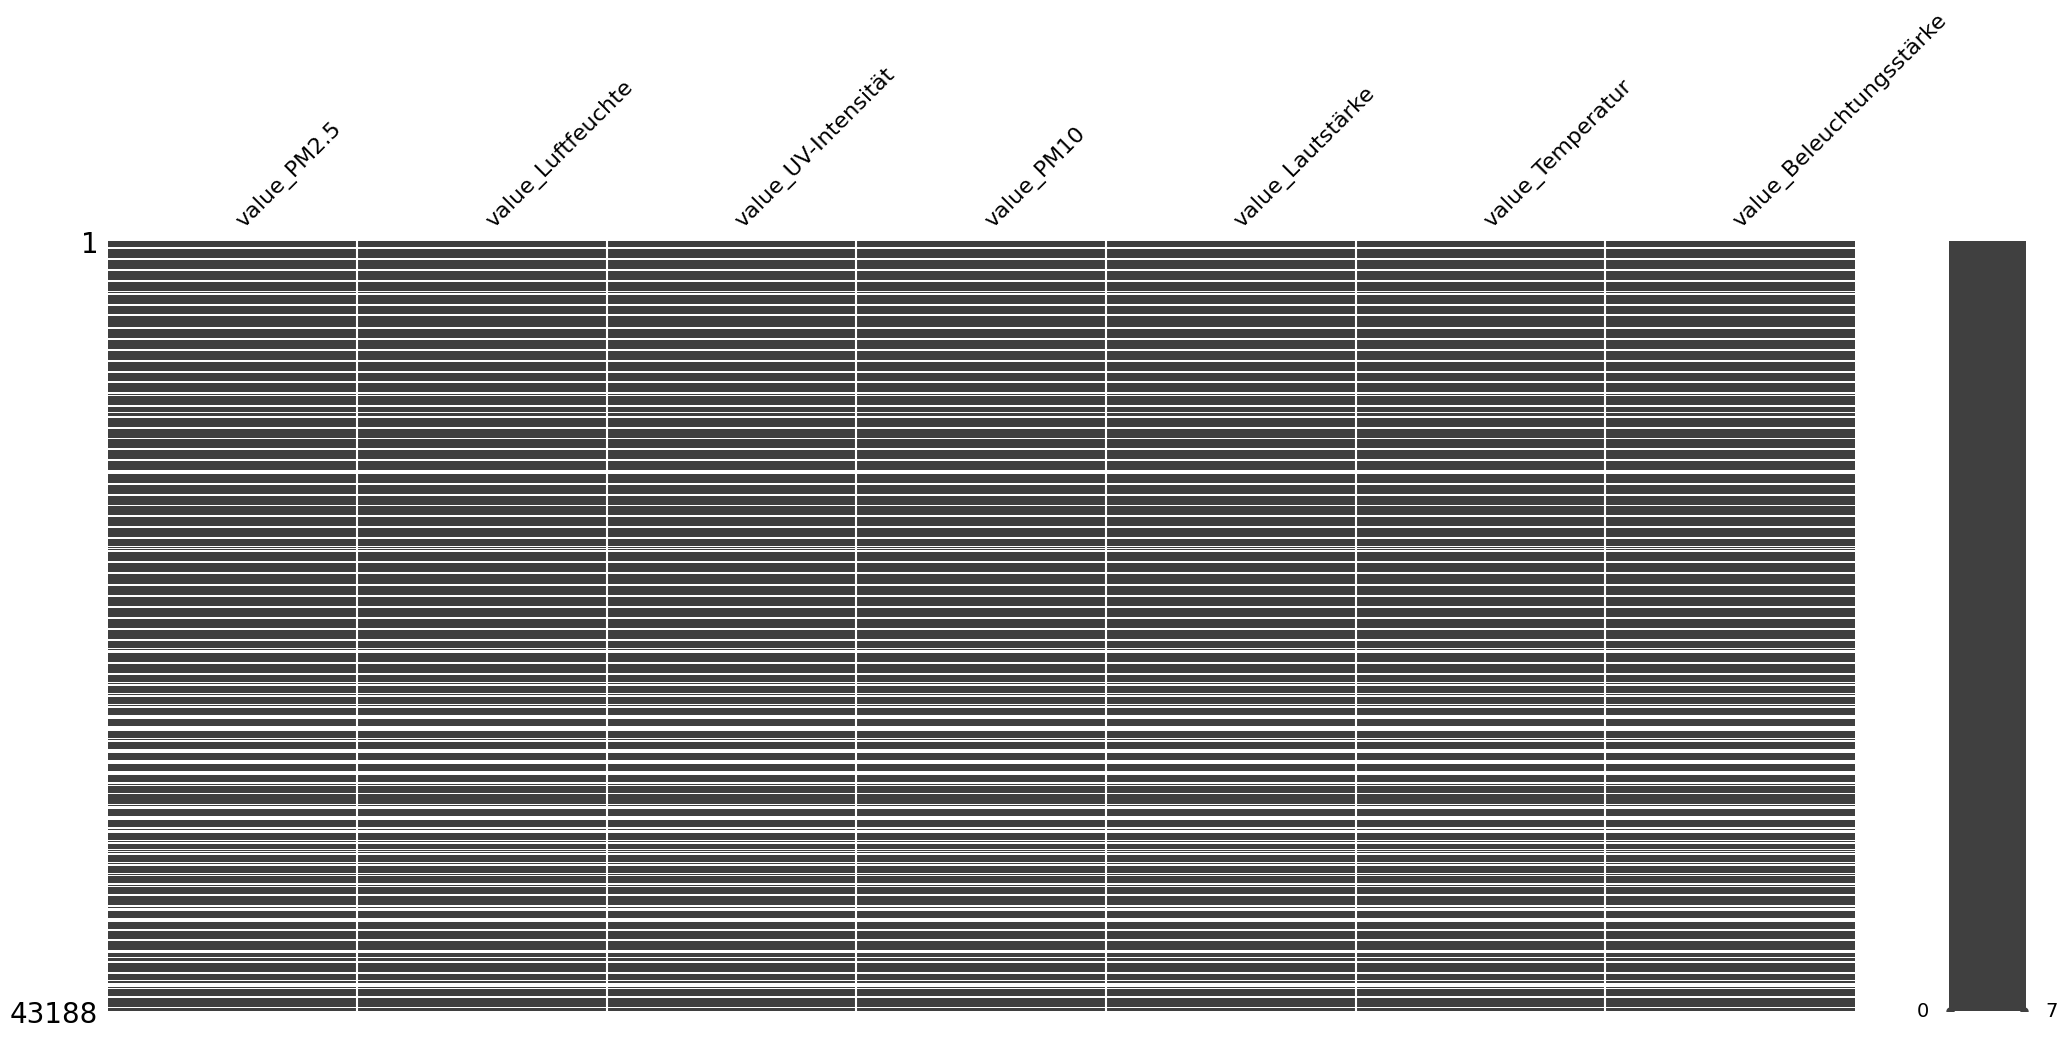


Schnus_Sense_Box

value_Luftfeuchte    137
value_Lautstärke     137
value_Temperatur     137
dtype: int64


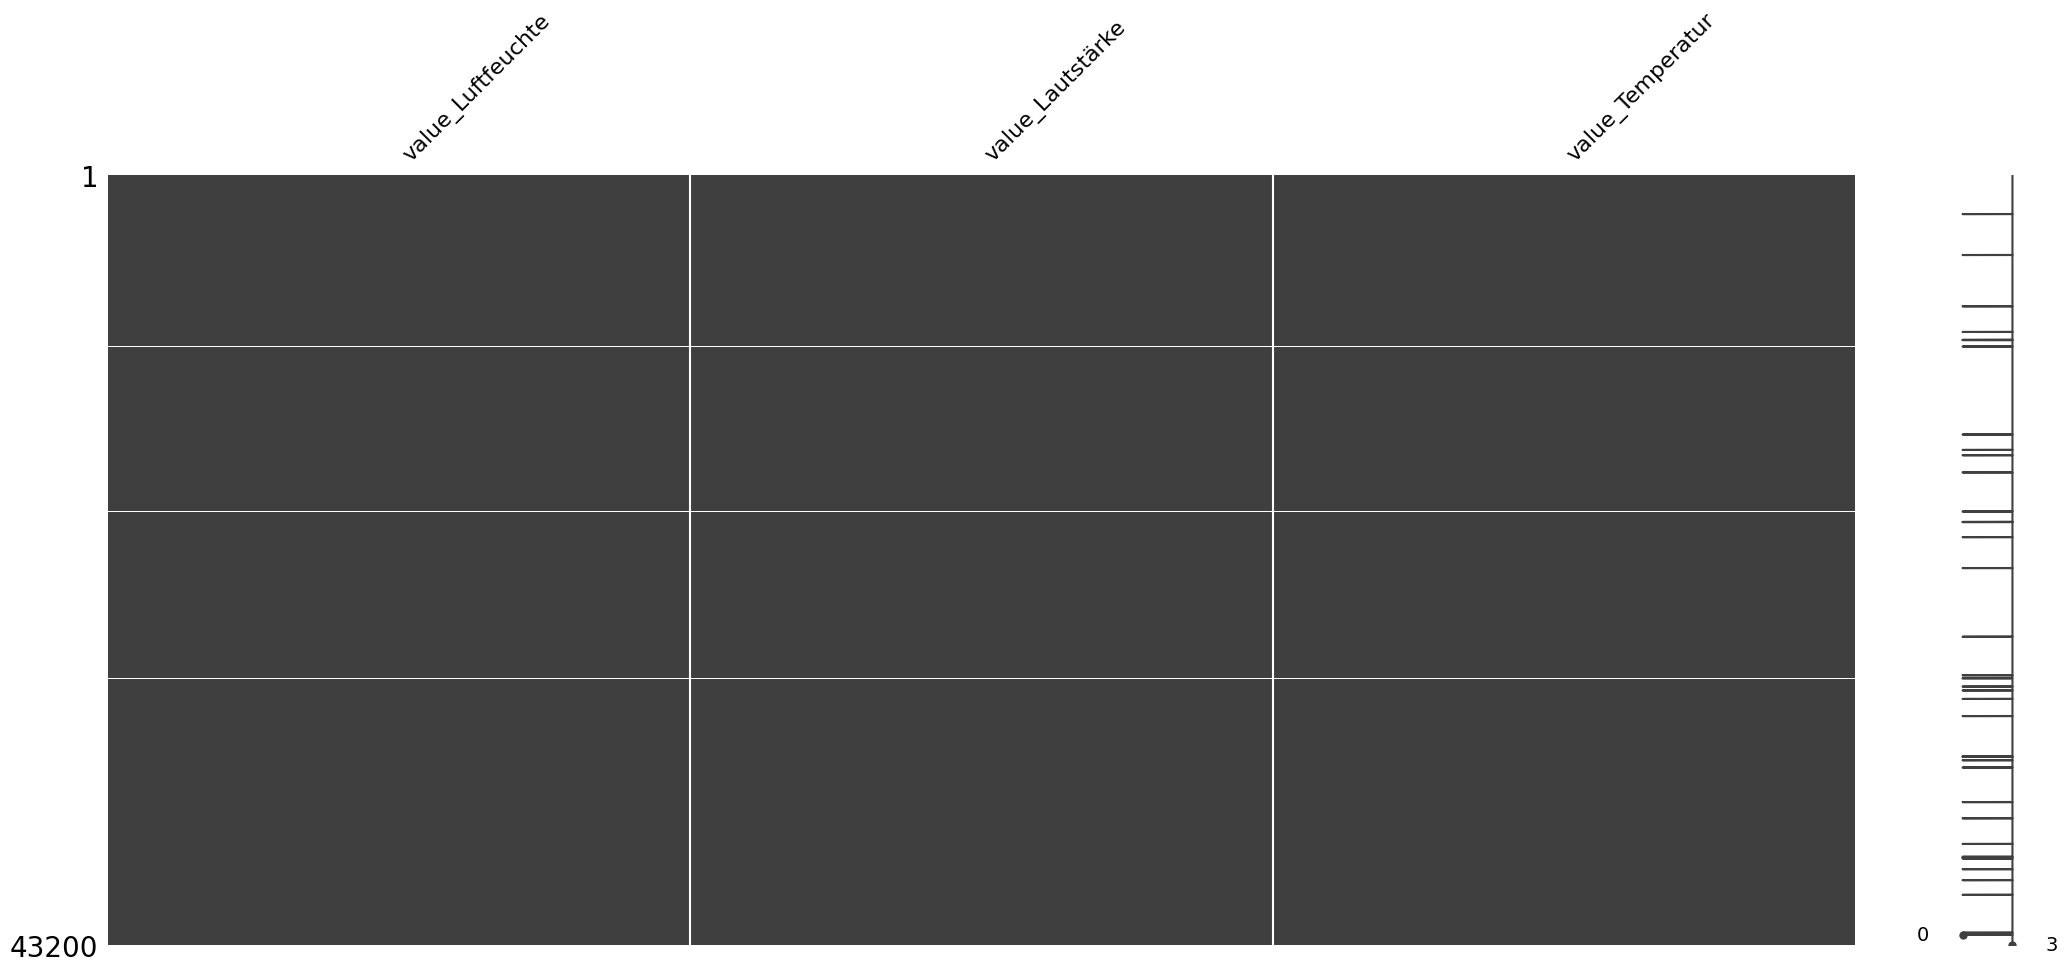


Stadtteilbüro_Siemensstadt

value_PM2.5                 1039
value_Luftfeuchte           1039
value_UV-Intensität         1039
value_PM10                  1039
value_Lautstärke            1039
value_Temperatur            1039
value_Beleuchtungsstärke    1039
dtype: int64


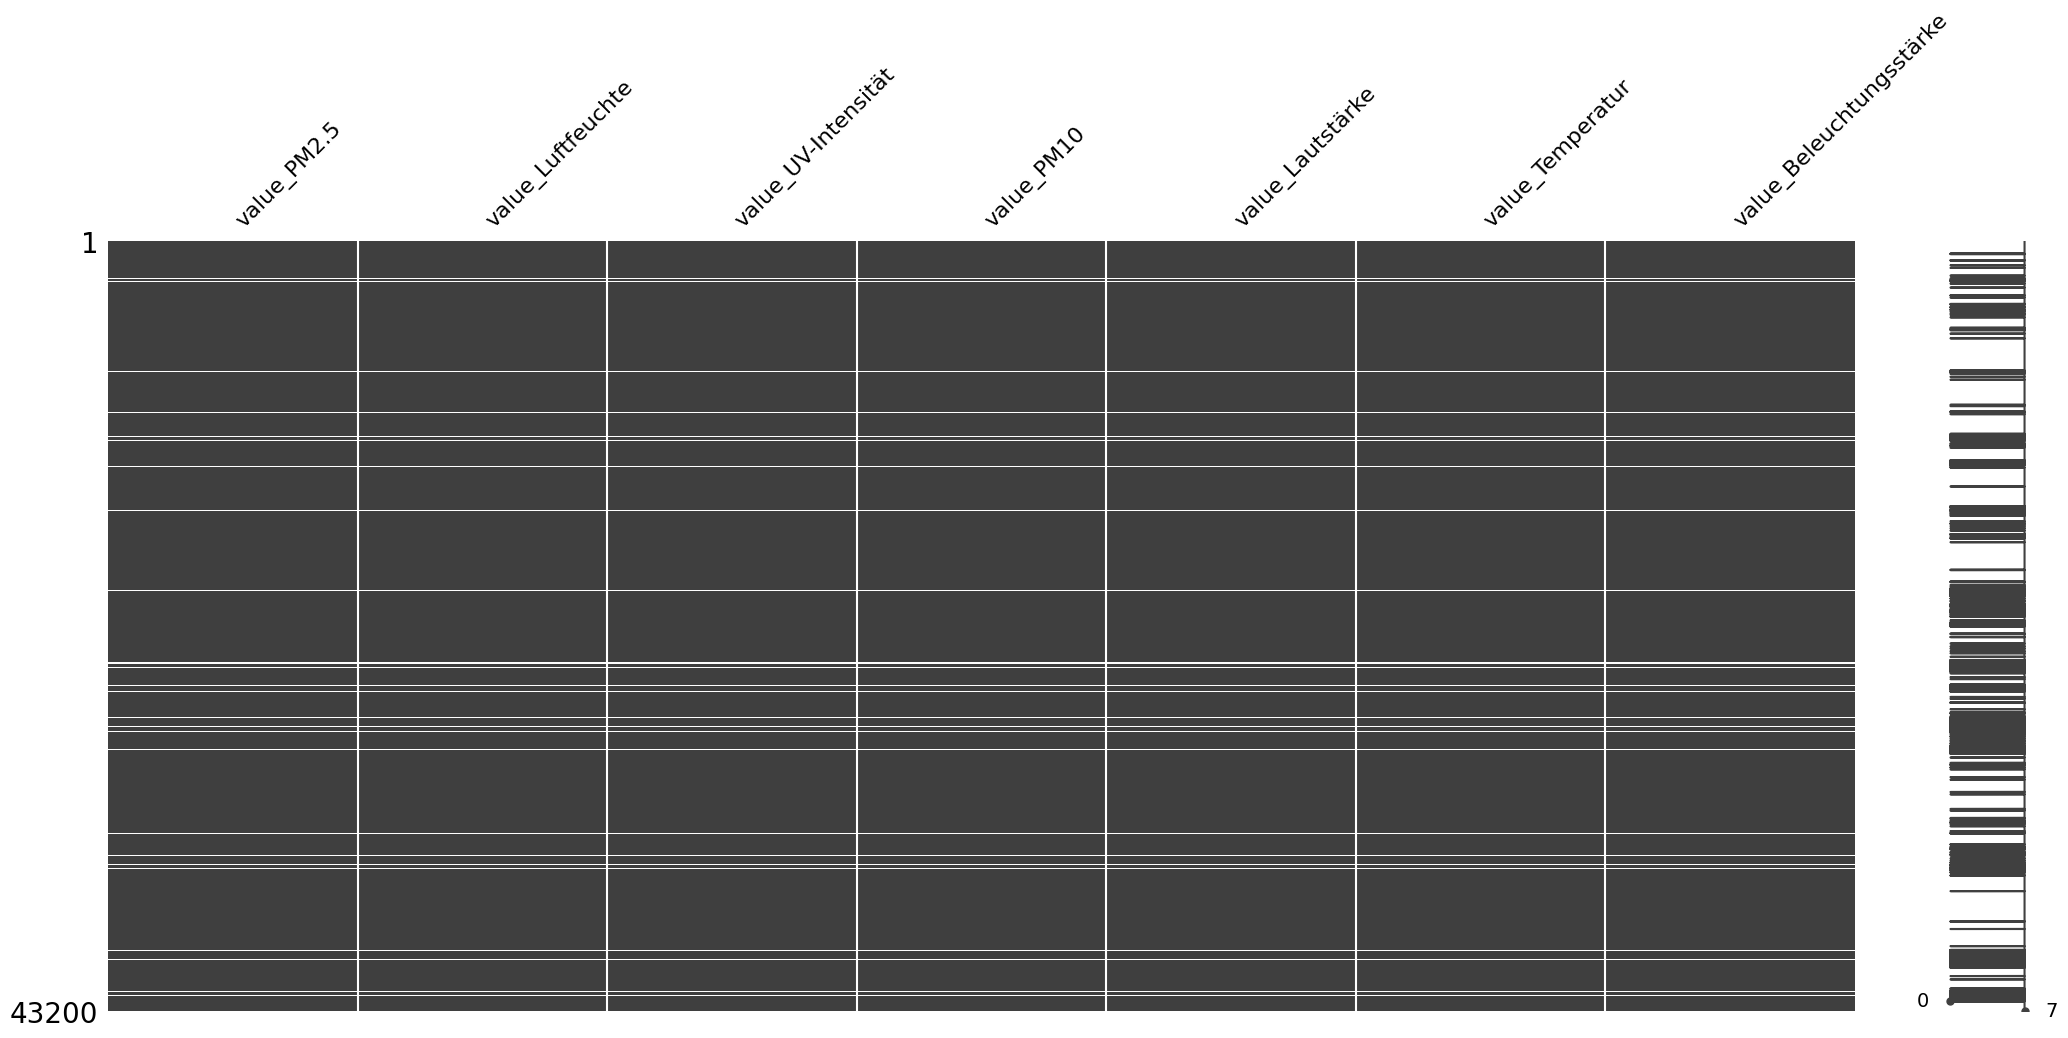


Lake_Barmen

value_PM2.5                 34897
value_Luftfeuchte           34897
value_UV-Intensität         34897
value_PM10                  34897
value_Lautstärke            34897
value_Temperatur            34897
value_Beleuchtungsstärke    34897
dtype: int64


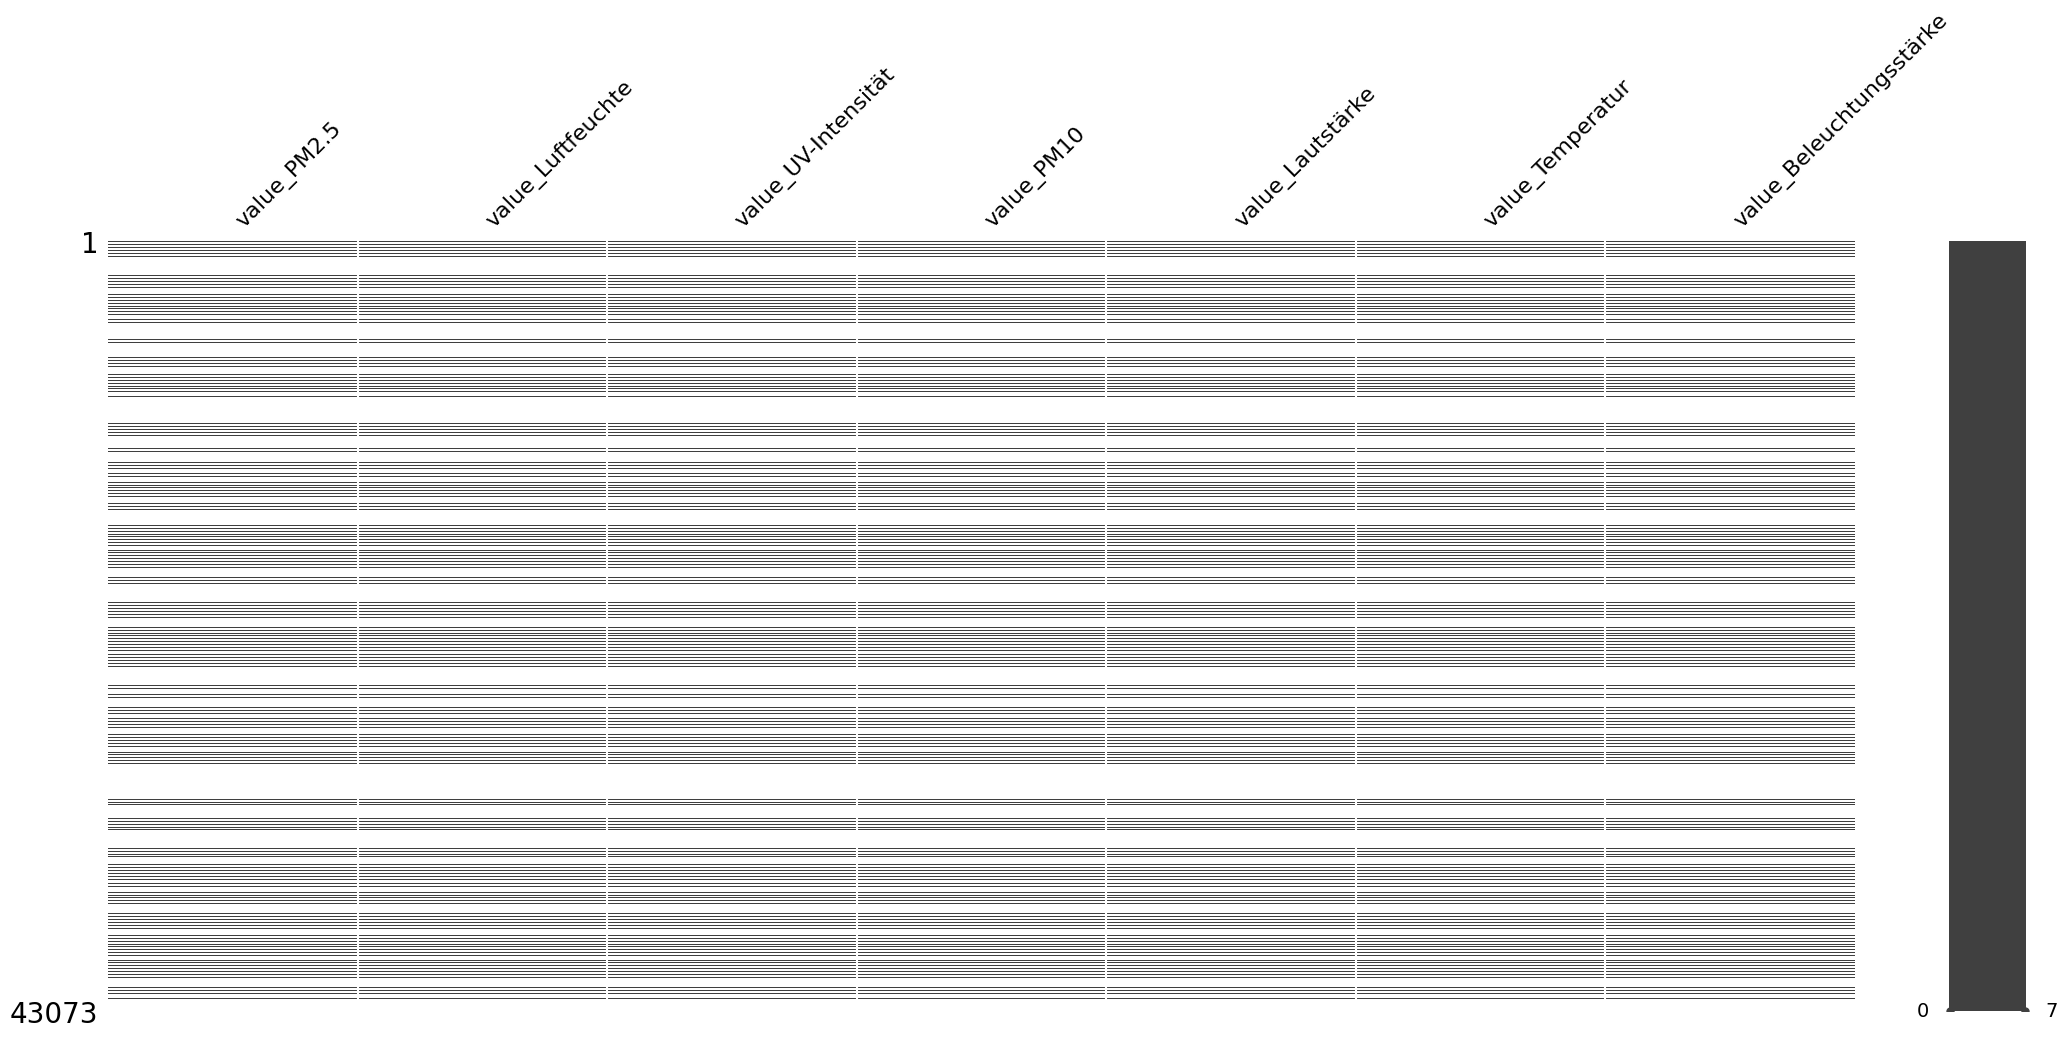

In [ ]:
import missingno as msno
for name, df in dataframes.items():
    print(f"\n{name}\n")
    print(df.isnull().sum())
    msno.matrix(df)
    plt.show()

Result: Huge ammount of missing values, especially for

## 


Processing PANGAEAs_SenseBox:

Total expected timestamps: 43200
Actual timestamps present: 43197
Missing timestamps: 3
Example missing timestamps:
DatetimeIndex(['2025-03-28 23:59:00+00:00', '2025-03-29 00:00:00+00:00',
               '2025-04-08 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)


/tmp/ipykernel_532113/2843912826.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=expected_freq)


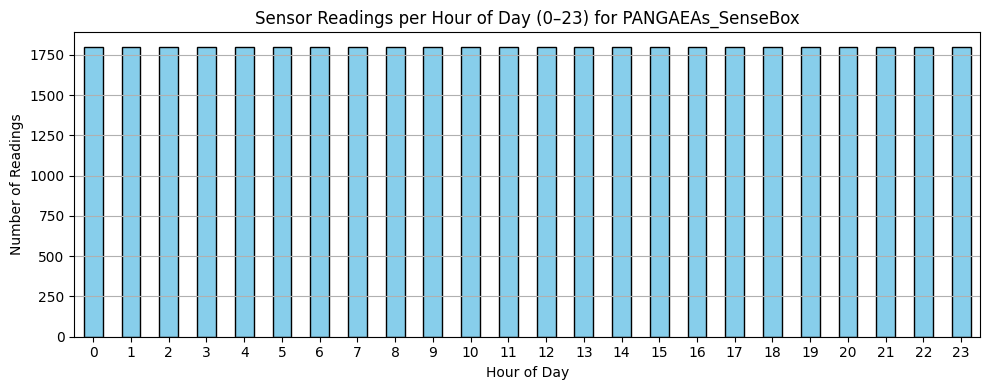


Processing Station_Kaiser:

Total expected timestamps: 42780
Actual timestamps present: 33780
Missing timestamps: 9000
Example missing timestamps:
DatetimeIndex(['2025-03-11 22:00:00+00:00', '2025-03-11 22:01:00+00:00',
               '2025-03-11 22:02:00+00:00', '2025-03-11 22:03:00+00:00',
               '2025-03-11 22:04:00+00:00', '2025-03-11 22:05:00+00:00',
               '2025-03-11 22:06:00+00:00', '2025-03-11 22:07:00+00:00',
               '2025-03-11 22:08:00+00:00', '2025-03-11 22:09:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)


/tmp/ipykernel_532113/2843912826.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=expected_freq)


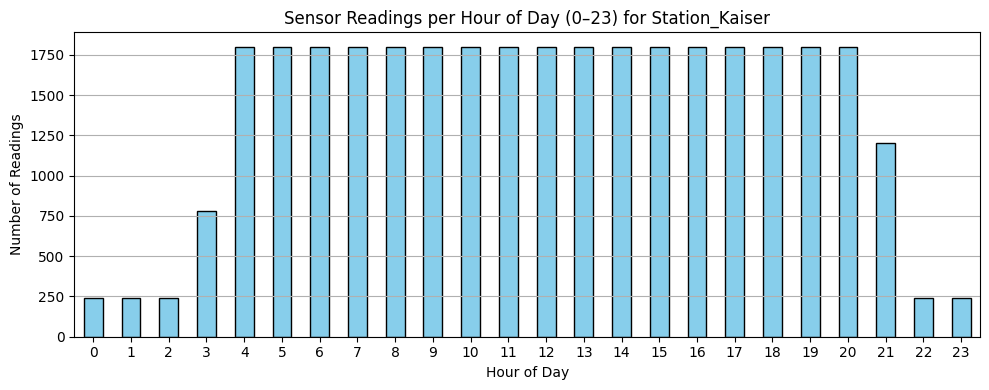


Processing home_Klinga:

Total expected timestamps: 43200
Actual timestamps present: 43189
Missing timestamps: 11
Example missing timestamps:
DatetimeIndex(['2025-03-12 00:00:00+00:00', '2025-03-14 23:59:00+00:00',
               '2025-03-17 23:59:00+00:00', '2025-03-19 23:59:00+00:00',
               '2025-03-22 23:59:00+00:00', '2025-03-25 23:59:00+00:00',
               '2025-03-28 23:59:00+00:00', '2025-03-29 00:00:00+00:00',
               '2025-04-01 00:00:00+00:00', '2025-04-04 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)


/tmp/ipykernel_532113/2843912826.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=expected_freq)


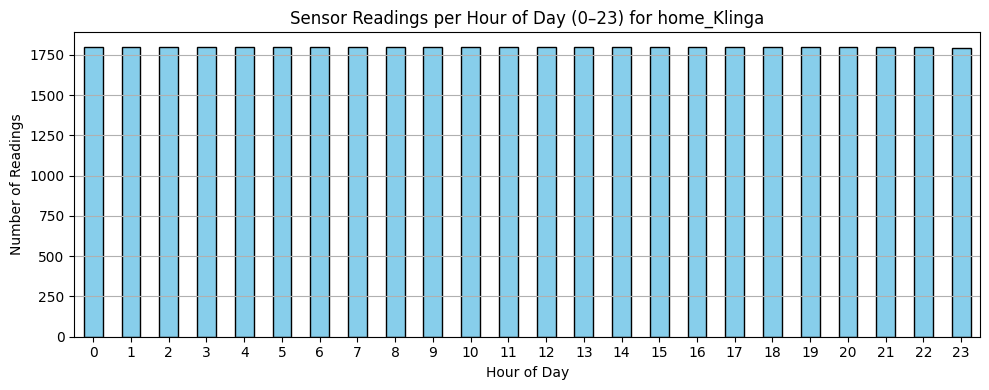


Processing SCOE:

Total expected timestamps: 43200
Actual timestamps present: 43188
Missing timestamps: 12
Example missing timestamps:
DatetimeIndex(['2025-03-12 23:59:00+00:00', '2025-03-14 00:00:00+00:00',
               '2025-03-17 00:00:00+00:00', '2025-03-19 23:59:00+00:00',
               '2025-03-22 23:59:00+00:00', '2025-03-24 00:00:00+00:00',
               '2025-03-27 00:00:00+00:00', '2025-03-29 23:59:00+00:00',
               '2025-04-01 23:59:00+00:00', '2025-04-03 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)


/tmp/ipykernel_532113/2843912826.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=expected_freq)


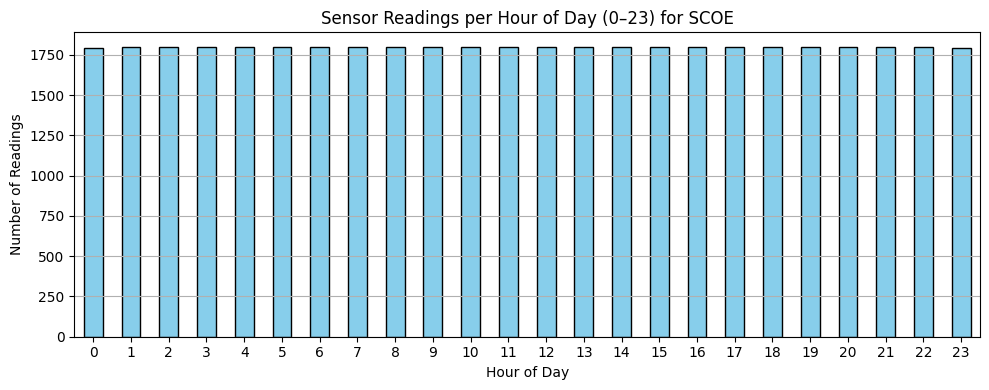


Processing Schnus_Sense_Box:

Total expected timestamps: 43200
Actual timestamps present: 43200

Processing Stadtteilbüro_Siemensstadt:

Total expected timestamps: 43200
Actual timestamps present: 43200

Processing Lake_Barmen:

Total expected timestamps: 43194
Actual timestamps present: 43073
Missing timestamps: 121
Example missing timestamps:
DatetimeIndex(['2025-03-12 00:00:00+00:00', '2025-03-12 00:01:00+00:00',
               '2025-03-12 00:02:00+00:00', '2025-03-12 00:03:00+00:00',
               '2025-03-12 00:04:00+00:00', '2025-03-13 00:00:00+00:00',
               '2025-03-13 00:01:00+00:00', '2025-03-13 00:02:00+00:00',
               '2025-03-13 00:03:00+00:00', '2025-03-14 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)


/tmp/ipykernel_532113/2843912826.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=expected_freq)


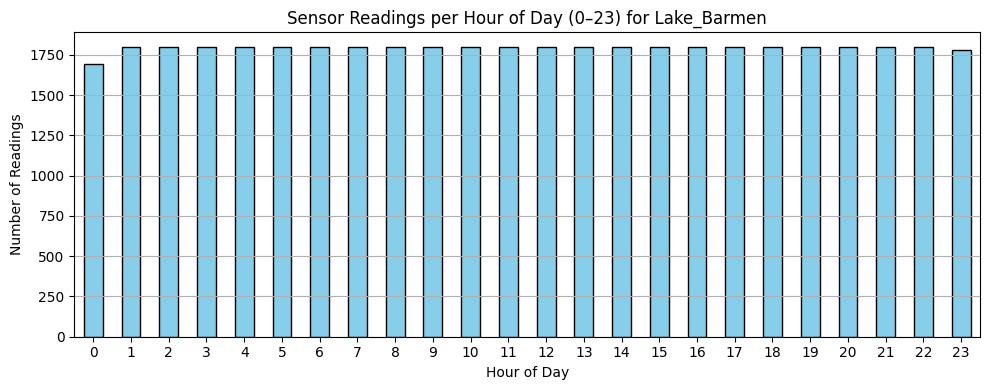

In [ ]:
# === CONFIG ===
timestamp_col = "timestamp"
expected_freq = "1T"  # e.g. 10-minute intervals

for name, df in dataframes.items():
    print(f"\nProcessing {name}:\n")
    df.sort_index(inplace=True)

    full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=expected_freq)
    missing_timestamps = full_range.difference(df.index)

    print(f"Total expected timestamps: {len(full_range)}")
    print(f"Actual timestamps present: {len(df)}")
    
    if len(missing_timestamps) > 0:
        print(f"Missing timestamps: {len(missing_timestamps)}")
        print("Example missing timestamps:")
        print(missing_timestamps[:10])
        
        hourly_counts = df.index.hour.value_counts().sort_index()

        plt.figure(figsize=(10, 4))
        hourly_counts.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title(f"Sensor Readings per Hour of Day (0–23) for {name}")
        plt.xlabel("Hour of Day")
        plt.ylabel("Number of Readings")
        plt.xticks(rotation=0)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

## Summary Statistics


In [ ]:
summary = []
for name, df in dataframes.items():
    info = {
        "Station": name,
        "Start": df.index.min(),
        "End": df.index.max(),
        "Total Rows": len(df),
        "Duplicates": df.index.duplicated().sum(),
        "Mean Temperature": df["value_Temperatur"].mean(),
        # "Mean PM2.5": df["value_PM2.5"].mean(),
        "Mean Luftfeuchte": df["value_Luftfeuchte"].mean(),
        # "Mean UV-Intensität": df["value_UV-Intensität"].mean(),
        "Mean Lautstärke": df["value_Lautstärke"].mean(),
        # "Mean Beleuchtungsstärke": df["value_Beleuchtungsstärke"].mean(),
        # "Mean PM10": df["value_PM10"].mean(),
        
        
    }
    summary.append(info)

pd.DataFrame(summary)


Station                     Start  \
0           PANGAEAs_SenseBox 2025-03-11 00:00:00+00:00   
1              Station_Kaiser 2025-03-11 04:00:00+00:00   
2                 home_Klinga 2025-03-11 00:00:00+00:00   
3                        SCOE 2025-03-11 00:00:00+00:00   
4            Schnus_Sense_Box 2025-03-11 00:00:00+00:00   
5  Stadtteilbüro_Siemensstadt 2025-03-11 00:00:00+00:00   
6                 Lake_Barmen 2025-03-11 00:04:00+00:00   

                        End  Total Rows  Duplicates  Mean Temperature  \
0 2025-04-09 23:59:00+00:00       43197           0         13.877836   
1 2025-04-09 20:59:00+00:00       33780           0         10.611464   
2 2025-04-09 23:59:00+00:00       43189           0          8.028927   
3 2025-04-09 23:59:00+00:00       43188           0         45.000000   
4 2025-04-09 23:59:00+00:00       43200           0         10.487936   
5 2025-04-09 23:59:00+00:00       43200           0         10.468533   
6 2025-04-09 23:57:00+00:00       43073           0         11.028503   

   Mean Luftfeuchte  Mean Lautstärke  
0         44.163253        41.272823  
1         62.860526        54.464175  
2         80.157167        41.582827  
3          0.000000        41.481036  
4         70.866267        48.169906  
5         60.104569        45.075123  
6         66.859796        40.437396


- Station Kaiser has less rows than others

- PM 25 / PM 10 are significantly higher for station Kaiser 

- UV Intensity and Beleuchtungsstarke have huge range
    -probably depends on their stations spot (shadow,)

 ## Histograms

Show how often a value occurs. You’ll immediately spot:

    Skewed distributions

    Clusters



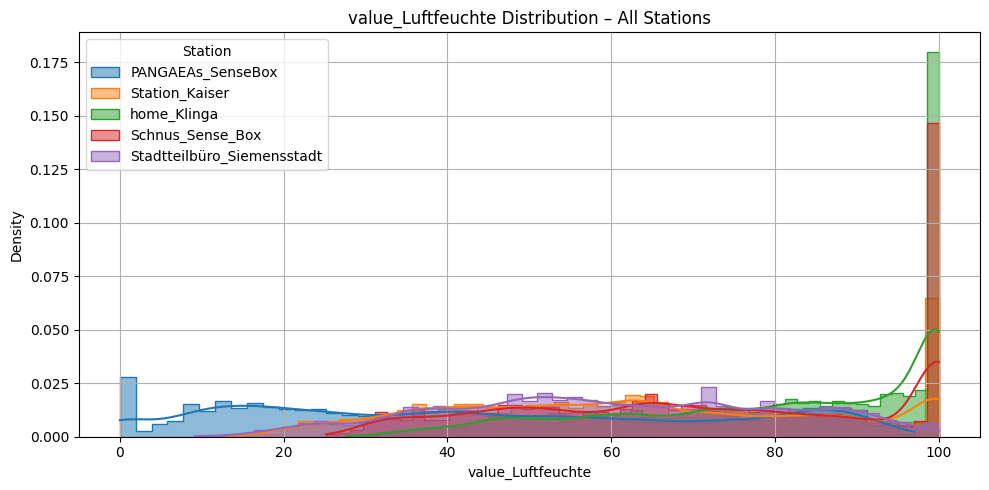

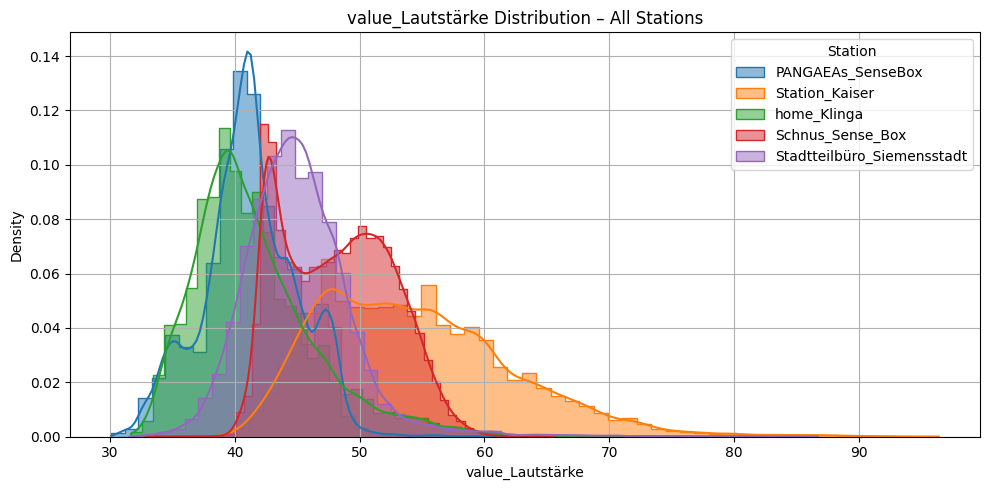

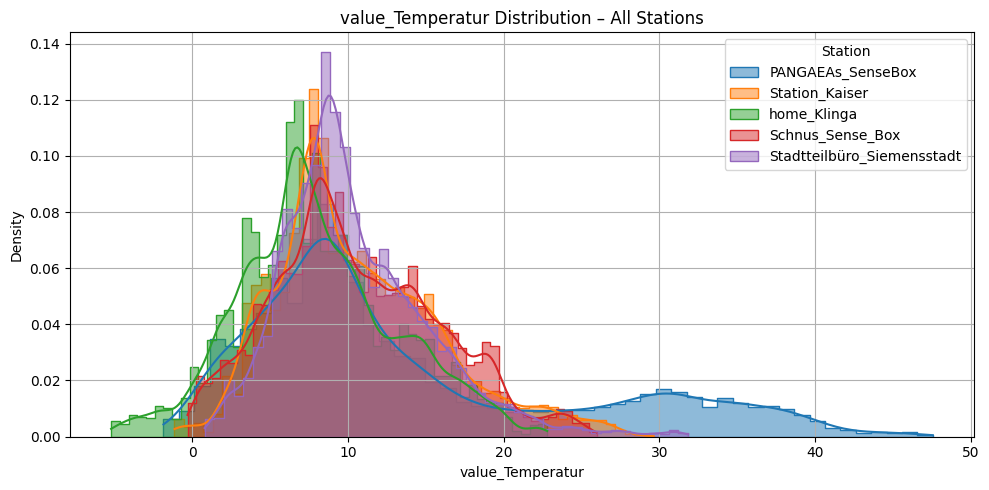

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


for sensor in sensors_to_explore:
    plt.figure(figsize=(10, 5))
    
    for name, df in dataframes.items():
        if sensor in df.columns:
            sns.histplot(df[sensor], kde=True, label=name, stat="density", bins=50, element="step")
    
    plt.title(f"{sensor} Distribution – All Stations")
    plt.xlabel(sensor)
    plt.ylabel("Density")
    plt.legend(title="Station")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Plotting each sensor for each station

Results: 
    - Kaisers shows a lot of noise in the data, while the other stations are more stable.
    - especially sensors for PM2.5 and PM10
    -UV Intesity and Beleuchtugnsstärke are also quite noisy
    

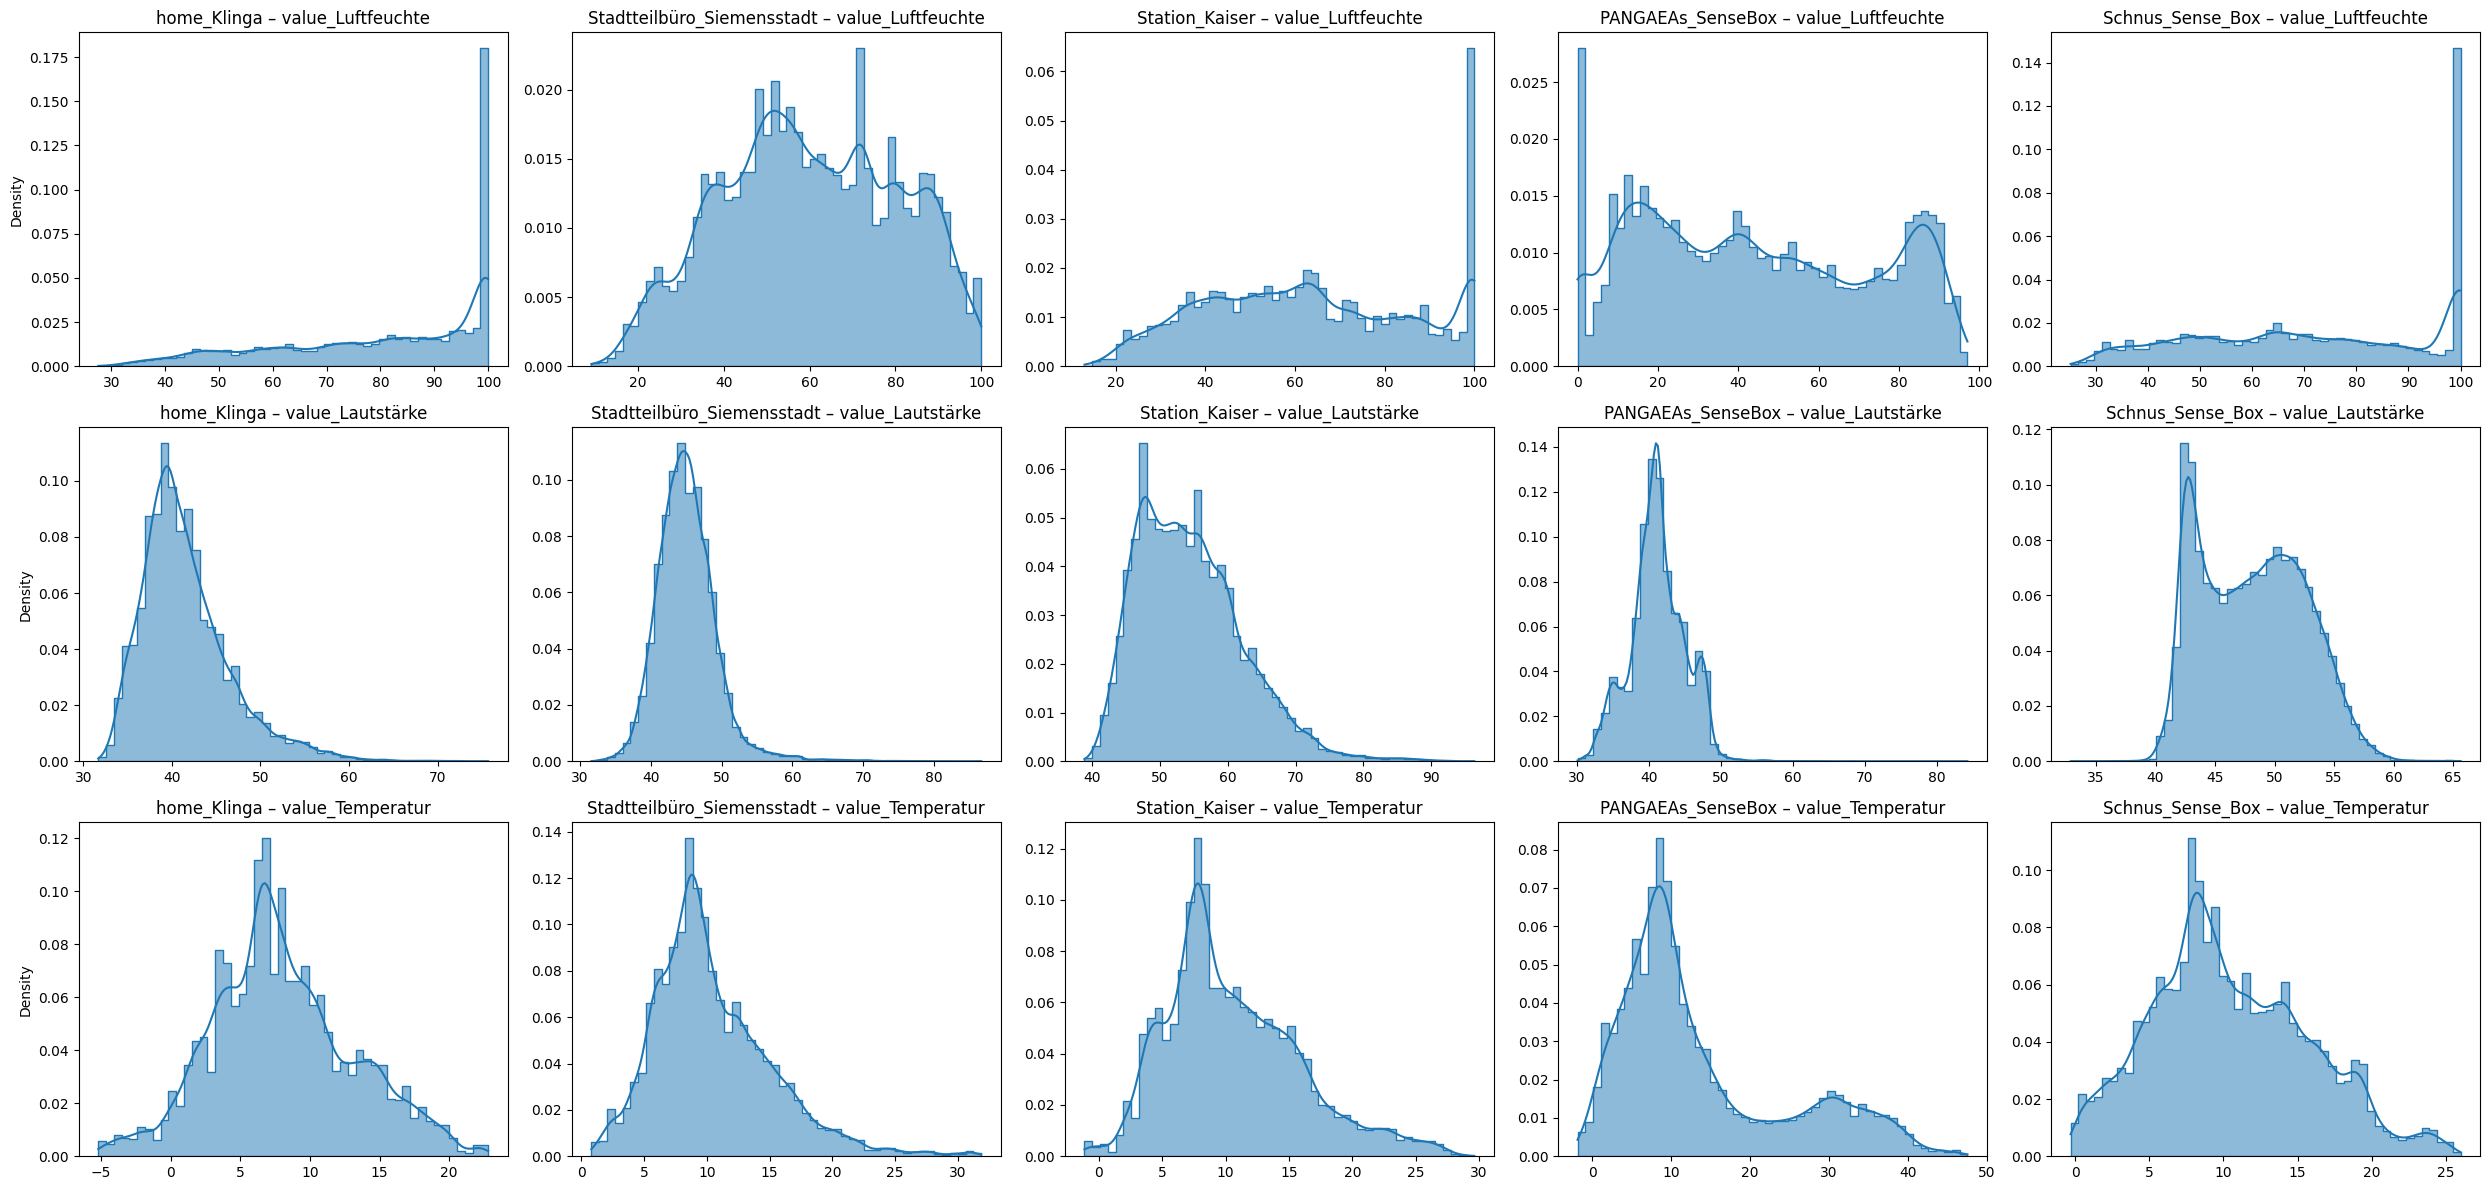

In [ ]:

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharex=False, sharey=False)

for i, sensor in enumerate(sensors_to_explore):
    for j, station in enumerate(stations_to_explore):
        ax = axes[i, j]
        df = dataframes[station]
        if sensor in df.columns:
            sns.histplot(df[sensor], kde=True, bins=50, element="step", stat="density", ax=ax)
            ax.set_title(f"{station} – {sensor}")
            ax.set_xlabel("")
            ax.set_ylabel("Density" if j == 0 else "")
        else:
            ax.set_visible(False)

plt.tight_layout()
plt.show()

   Extreme values (potential anomalies)

    - PM 2.5 / PM 10 cluster around 0 -> no detection
        - high values only for kaiser
    
    unnormal behavior for humidity sensor of klinga -> mostly 100 %

## Box Plot for outlier detection

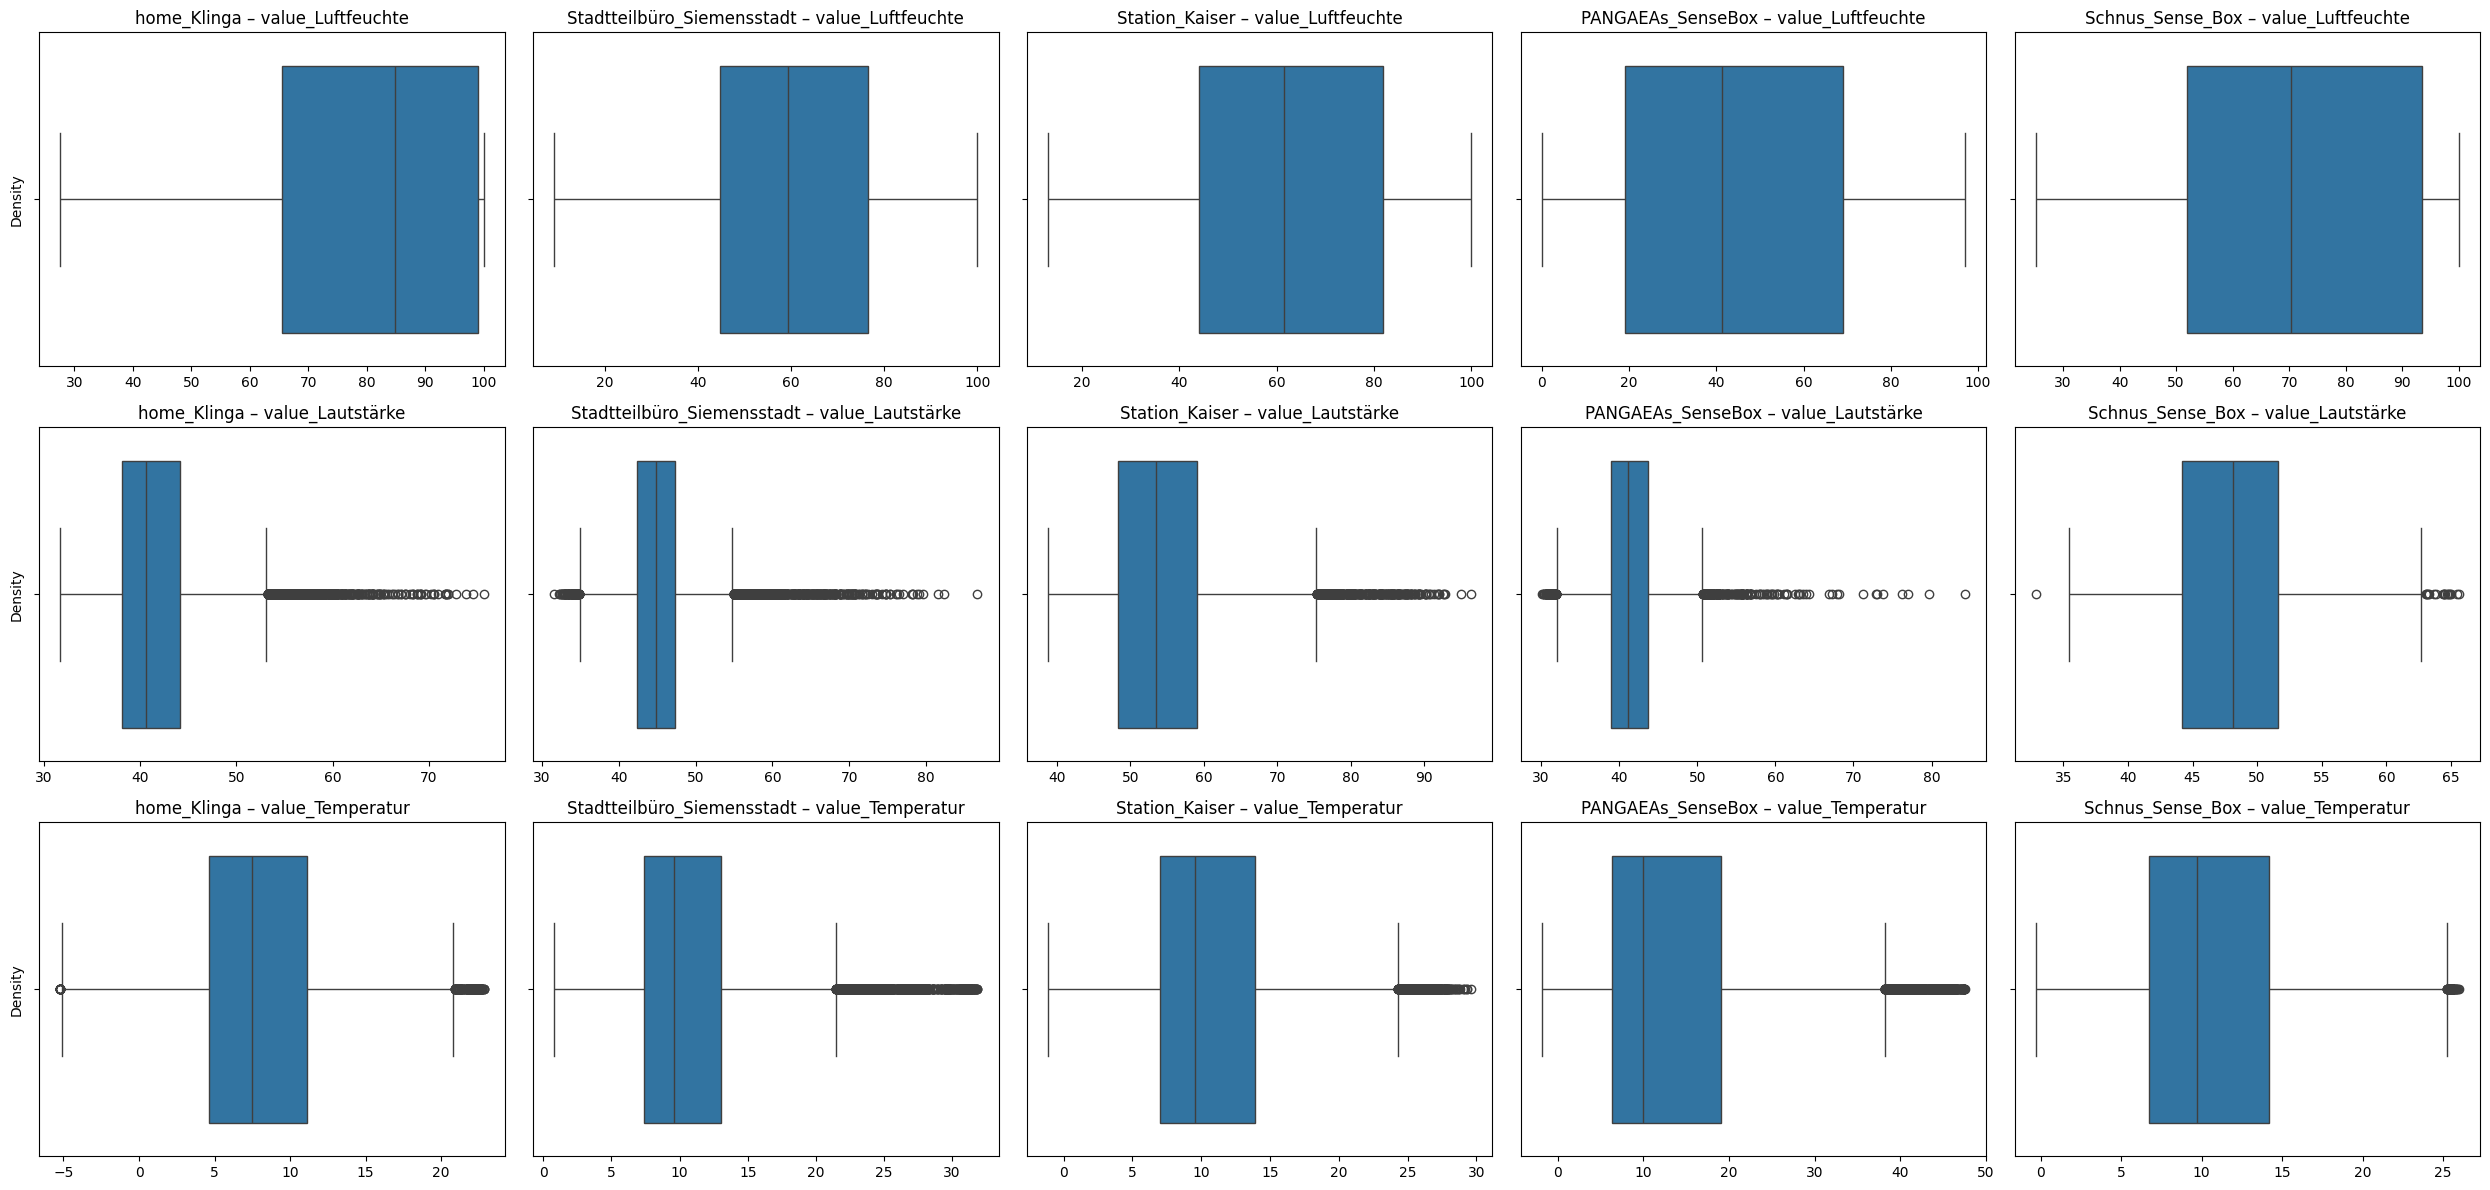

In [ ]:

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharex=False, sharey=False)

for i, sensor in enumerate(sensors_to_explore):
    for j, station in enumerate(stations_to_explore):
        ax = axes[i, j]
        df = dataframes[station]
        if sensor in df.columns:
            sns.boxplot(x=df[sensor], ax =ax)
            # sns.histplot(df[sensor], kde=True, bins=50, element="step", stat="density", ax=ax)
            ax.set_title(f"{station} – {sensor}")
            ax.set_xlabel("")
            ax.set_ylabel("Density" if j == 0 else "")
        else:
            ax.set_visible(False)

plt.tight_layout()
plt.show()

## Time Series Visualization



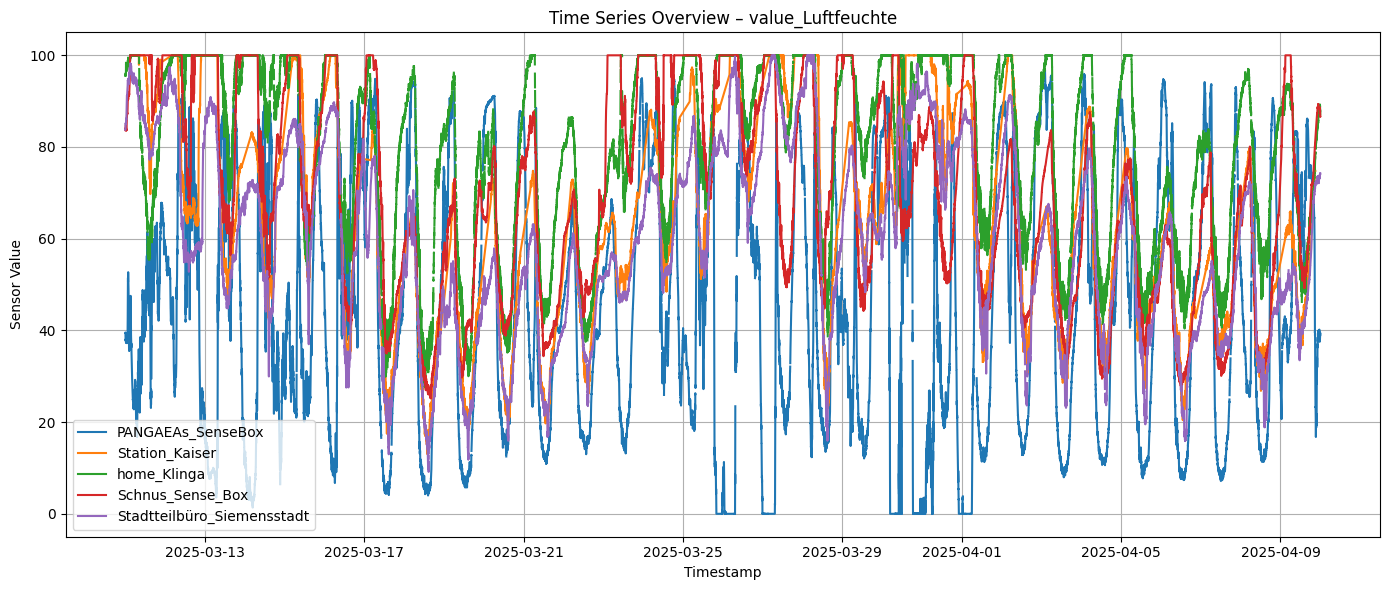

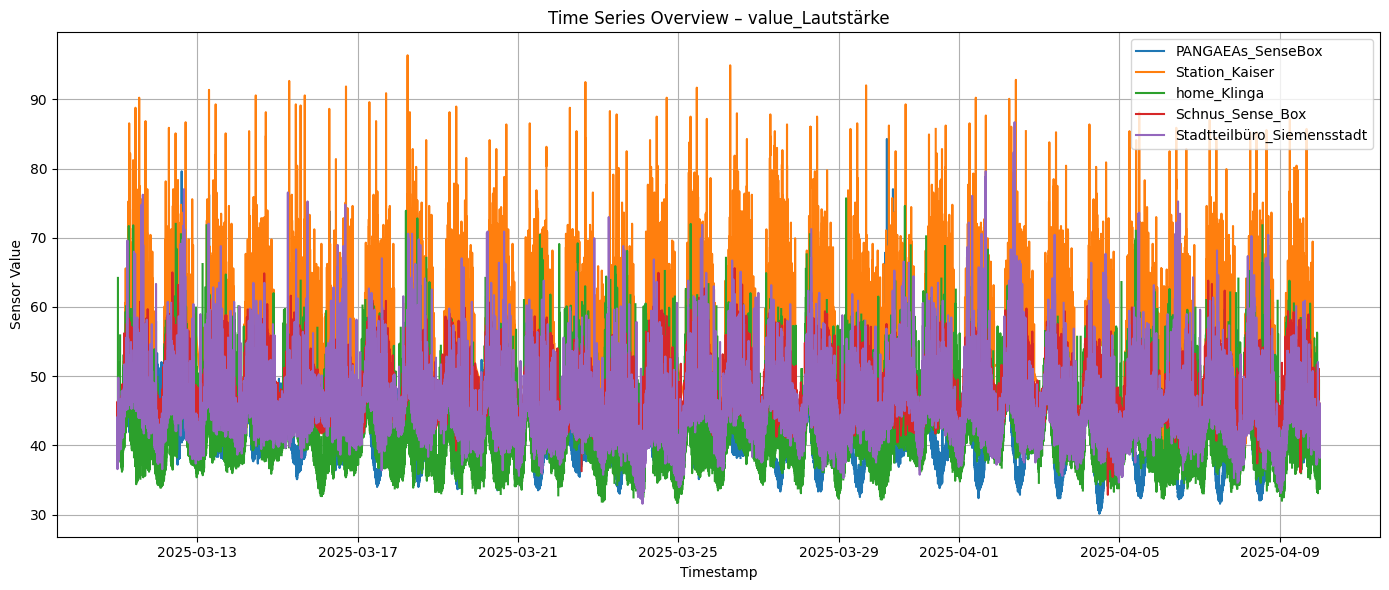

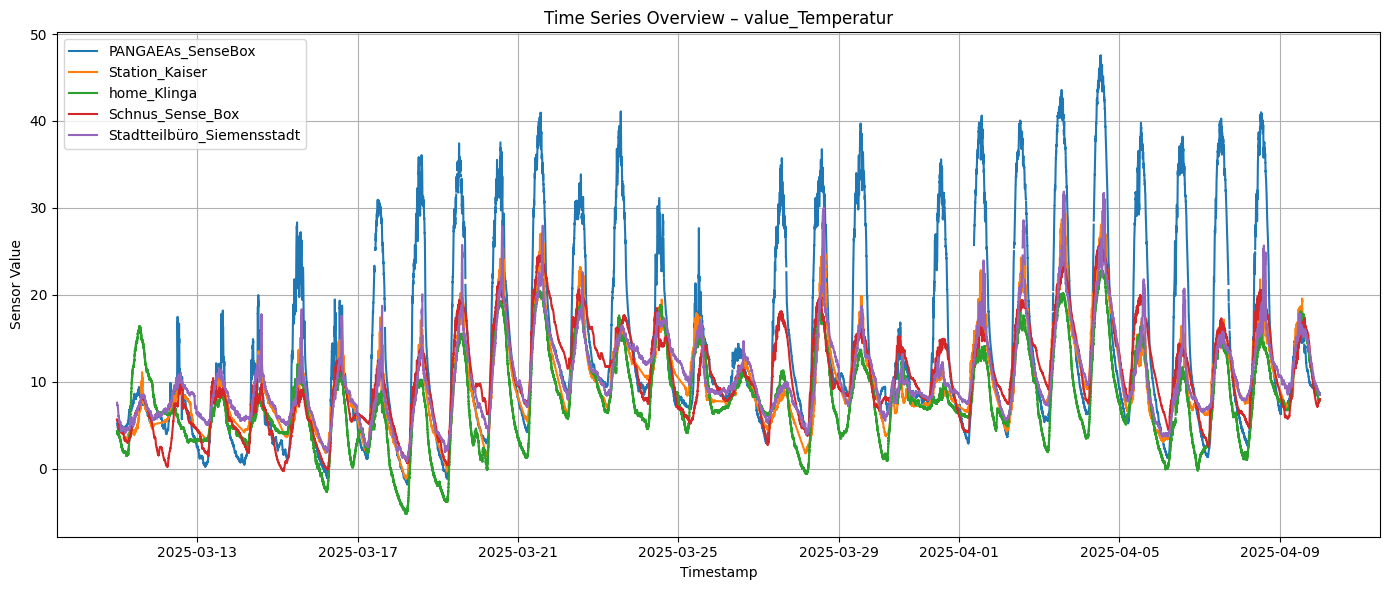

In [ ]:
for sensor in sensors_to_explore:

    plt.figure(figsize=(14, 6))
    for name, df in dataframes.items():
        if sensor in df.columns:
            plt.plot(df.index, df[sensor], label=name)
    plt.title(f"Time Series Overview – {sensor}")
    plt.xlabel("Timestamp")
    plt.ylabel("Sensor Value")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

## Zoomed Time Series Visualization

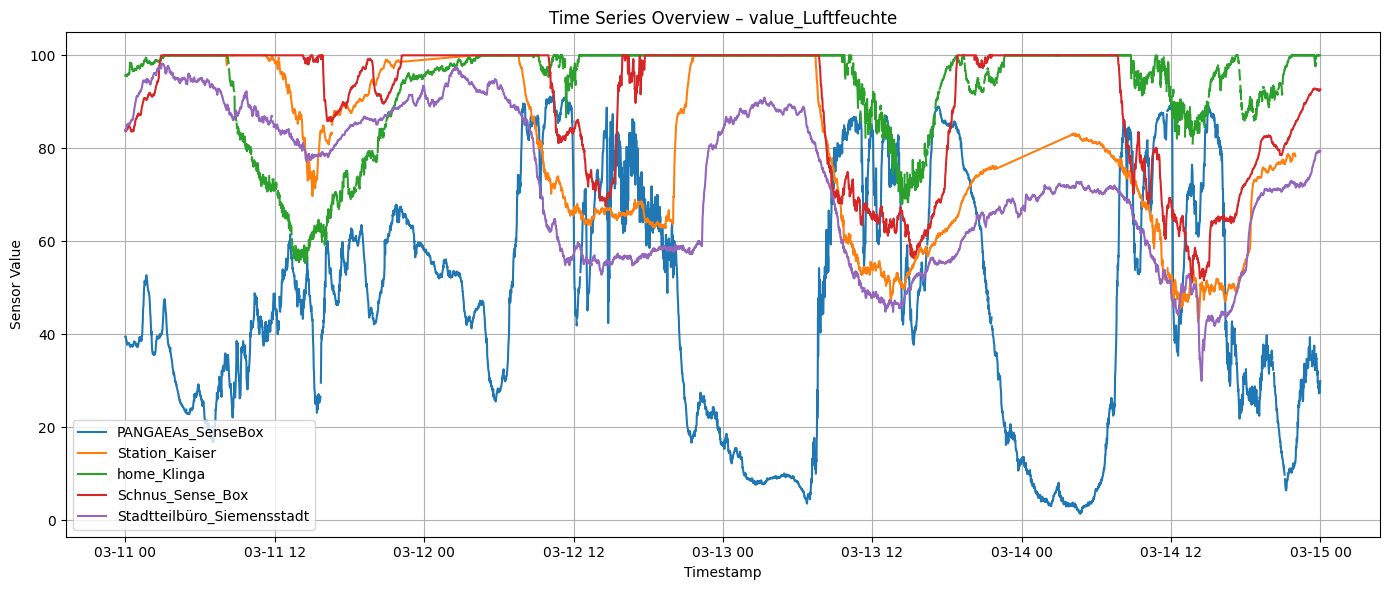

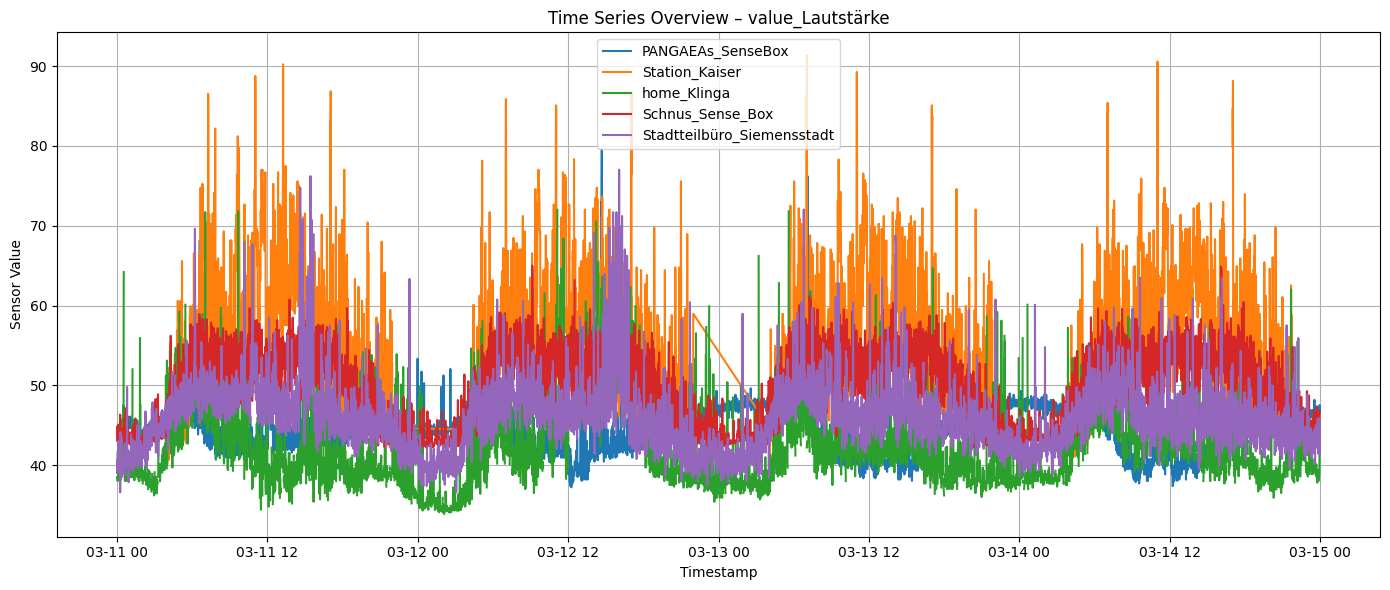

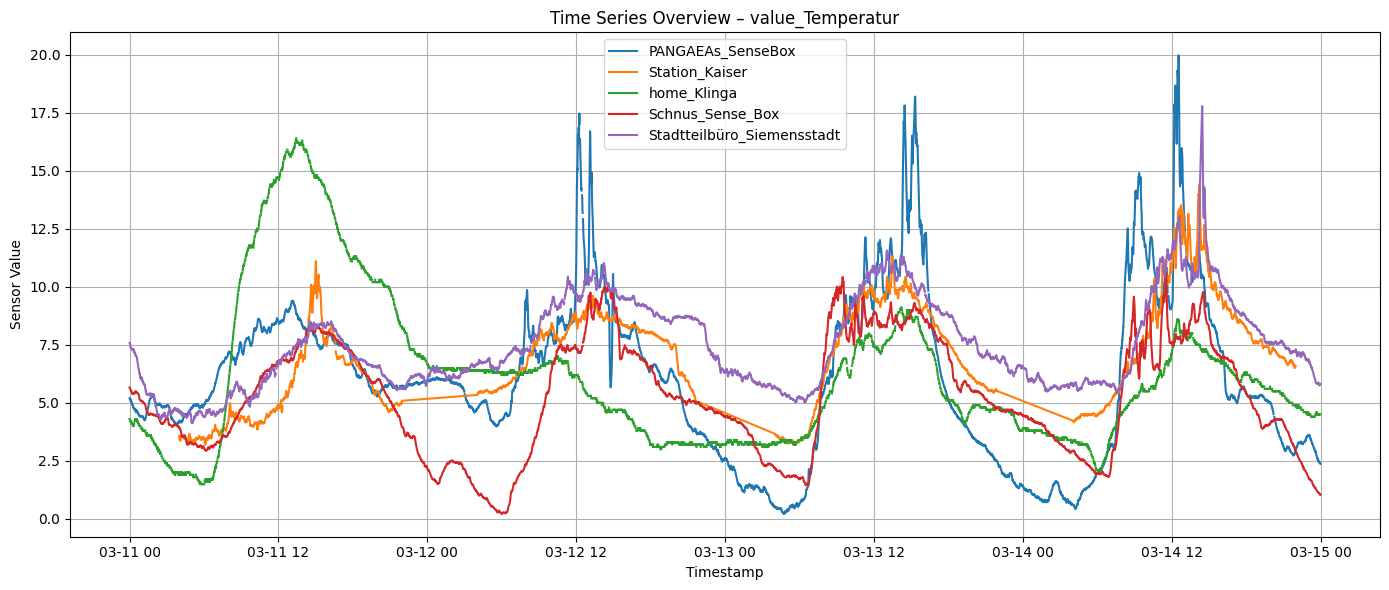

In [ ]:

for sensor in sensors_to_explore:

    plt.figure(figsize=(14, 6))
    for name, df in dataframes.items():
        zoomed_df = df[df.index < df.index[0] + pd.Timedelta(hours=96)]
        
        if sensor in zoomed_df.columns:
            plt.plot(zoomed_df.index, zoomed_df[sensor], label=name)
    plt.title(f"Time Series Overview – {sensor}")
    plt.xlabel("Timestamp")
    plt.ylabel("Sensor Value")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

## Missing Value Heatmaps

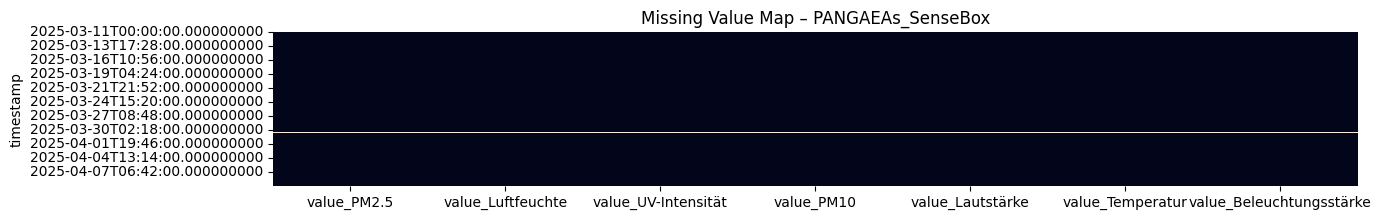

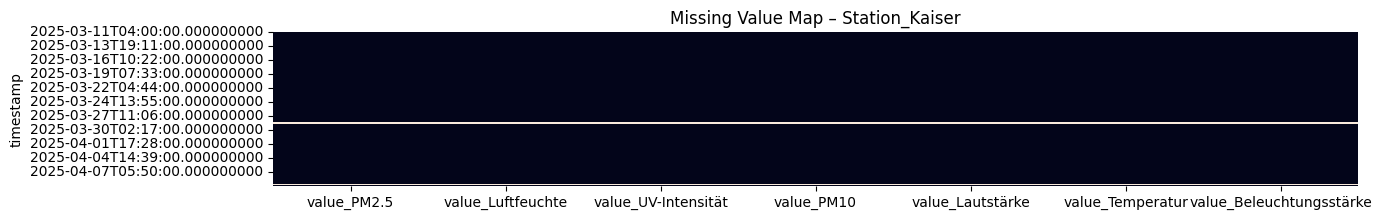

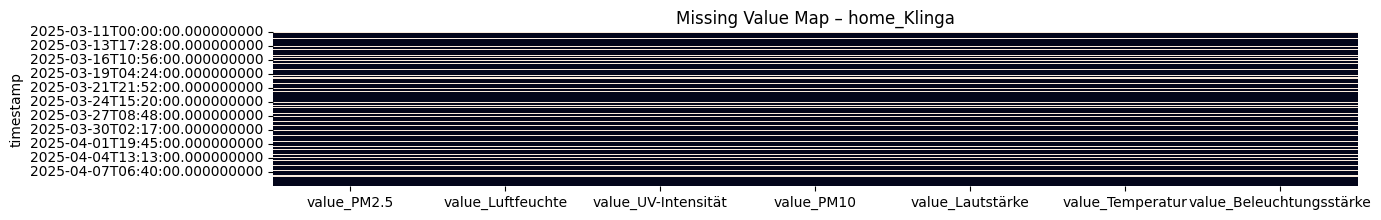

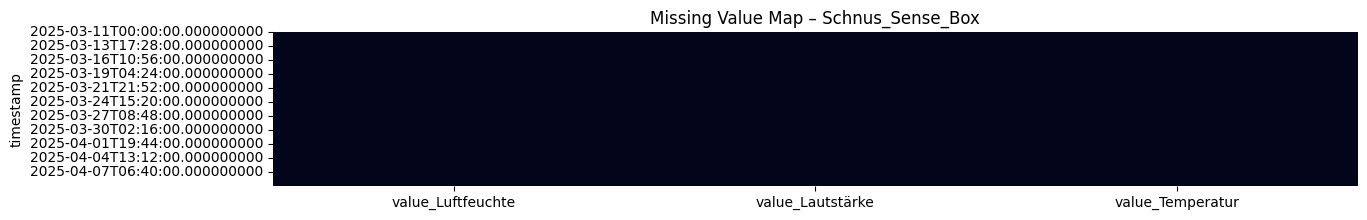

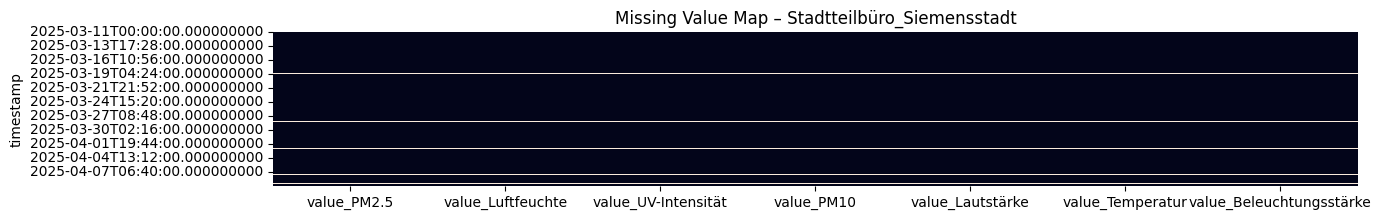

In [ ]:
for name, df in dataframes.items():
    plt.figure(figsize=(14, 2))
    sns.heatmap(df.isnull(), cbar=False)
    plt.title(f"Missing Value Map – {name}")
    plt.show()


## Correlation Matrices

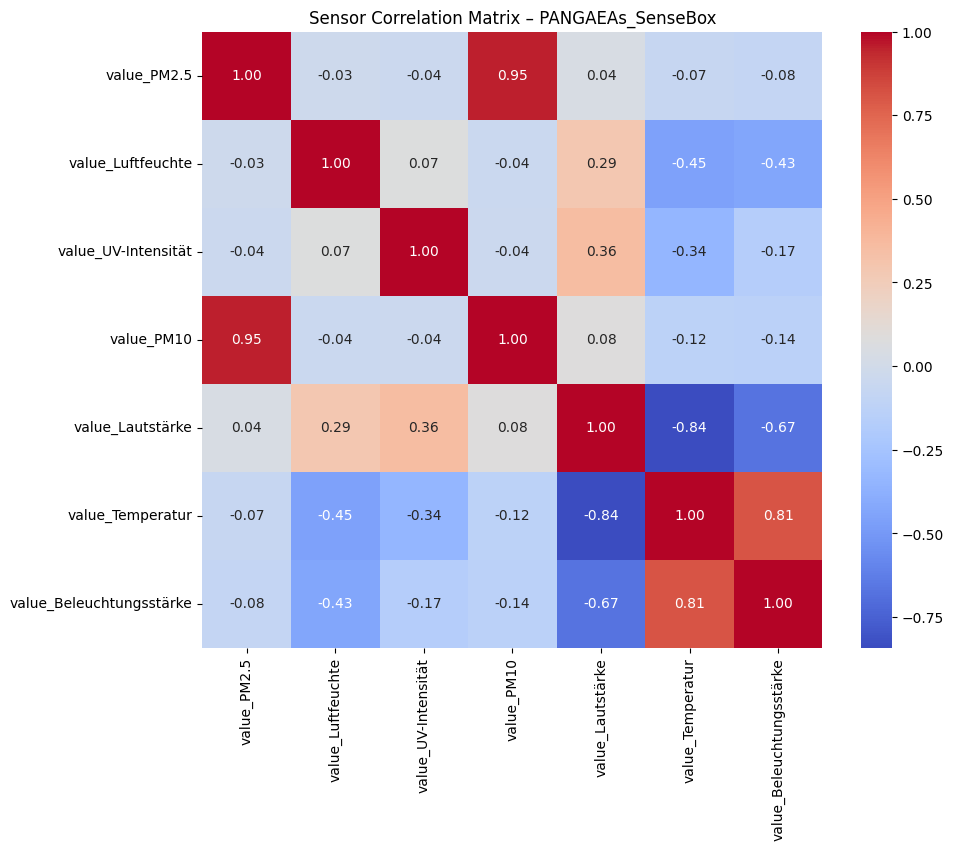

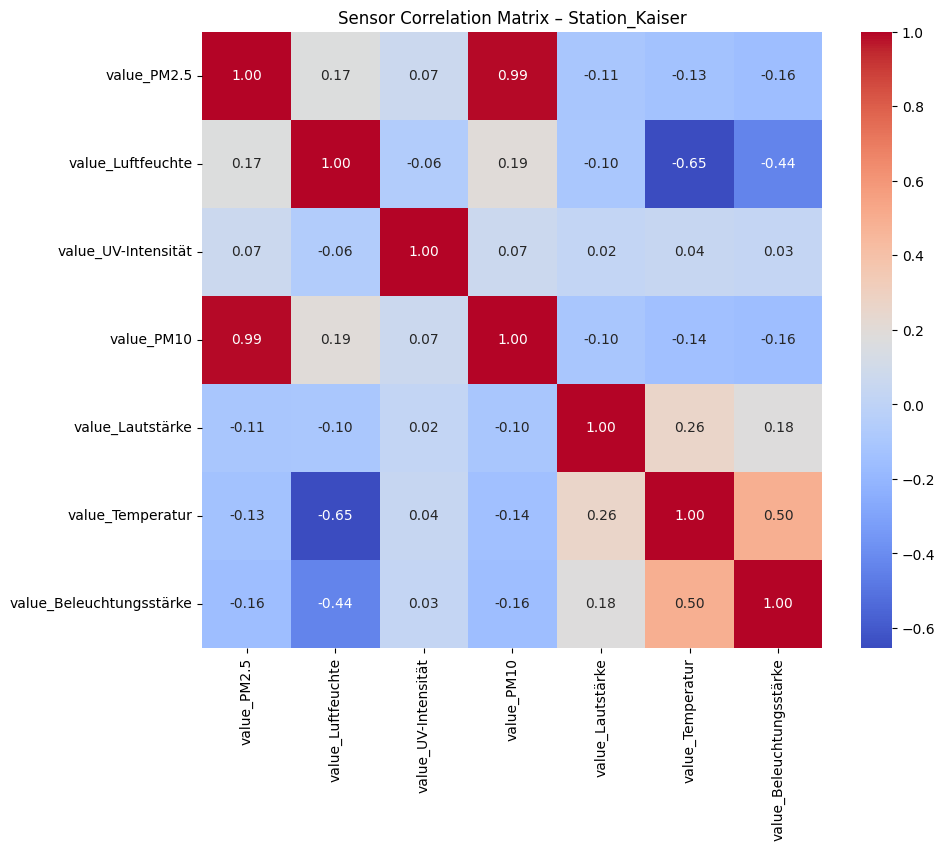

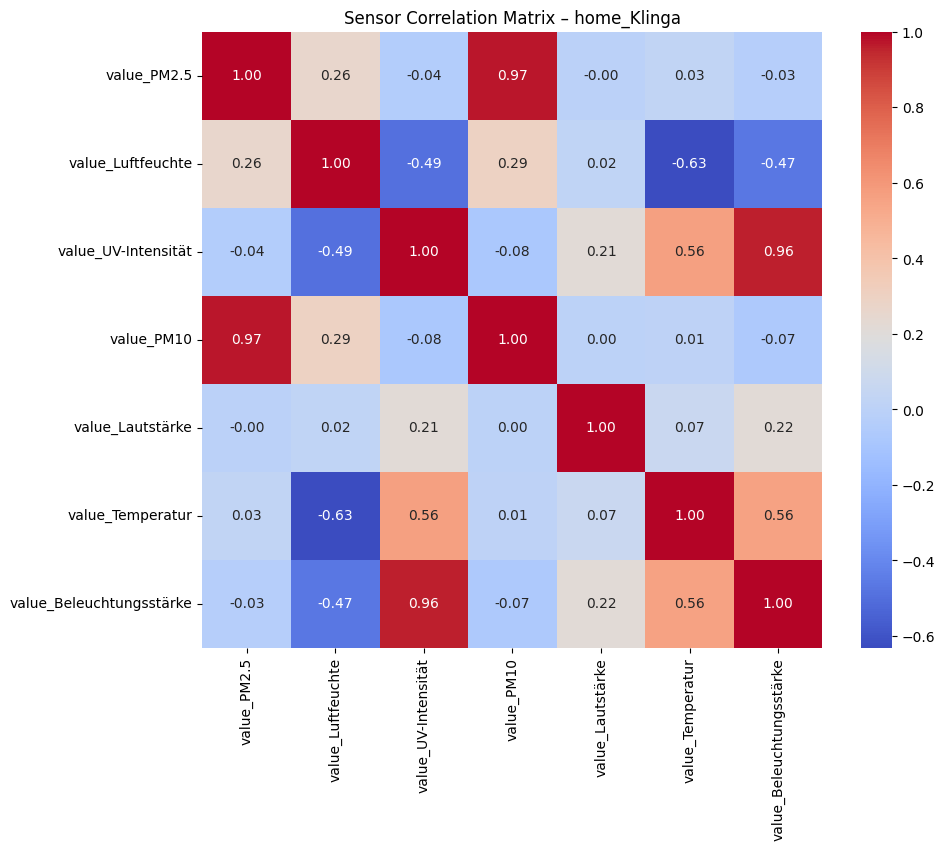

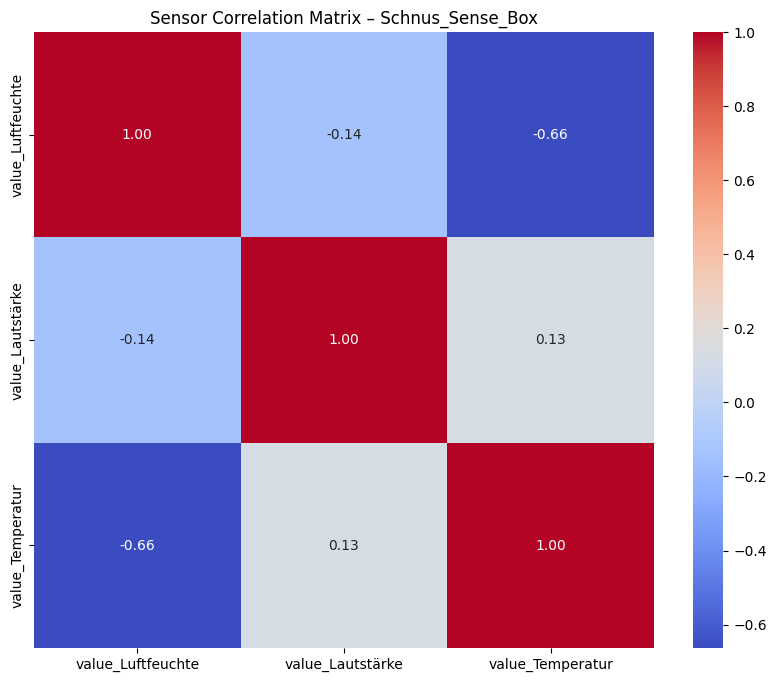

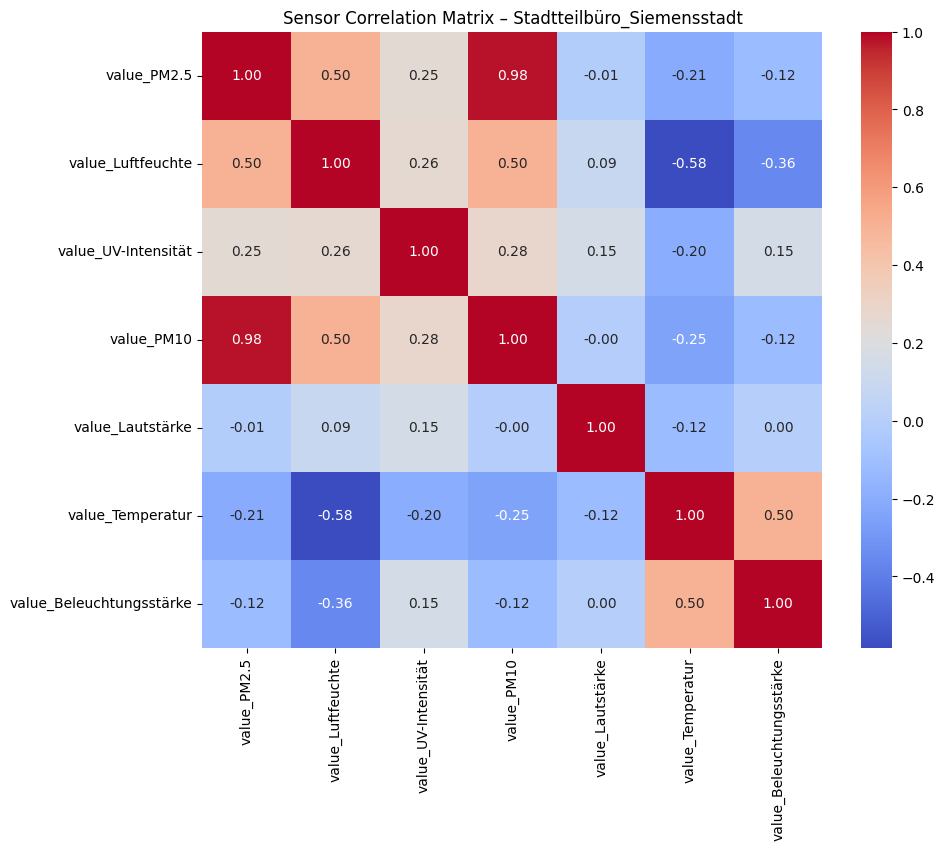

In [ ]:
for name, df in dataframes.items():
    plt.figure(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Sensor Correlation Matrix – {name}")
    plt.show()


Results: 
- PM 2.5 and PM 100 are correlated, therefore we can drop one
- Also high coorelation between UV and temperature _. due to sunlight
- almost no correlation between PM 10 / PM 2.5 and Lautstaerke / Temp / Humidity
- Correlation between sound vloume and temp / humidty just for Pangea Sensor box

## Outlier detection
- using z score - . punish values far away from mean
- Bad air quality due to winter comback and use of stoves. (PM2.5 /Pm 10)
- General higher values for PM2.5 / PM10 at Kiaserdamm (Kaiser Station) 
    High PM 2.5 / 10 at end of record time. Maybe moved? 

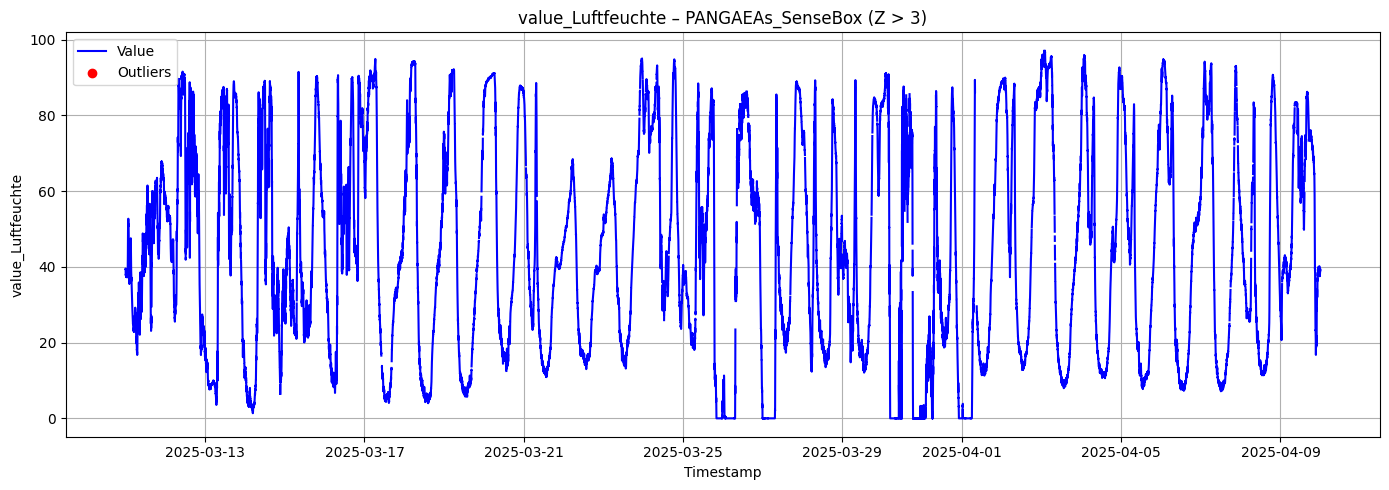

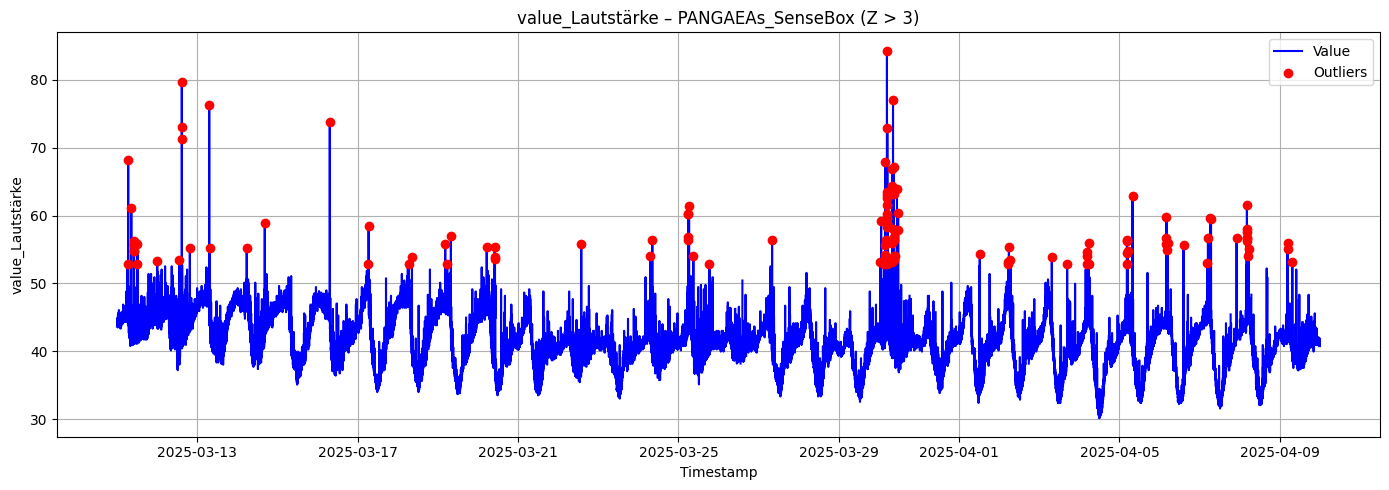

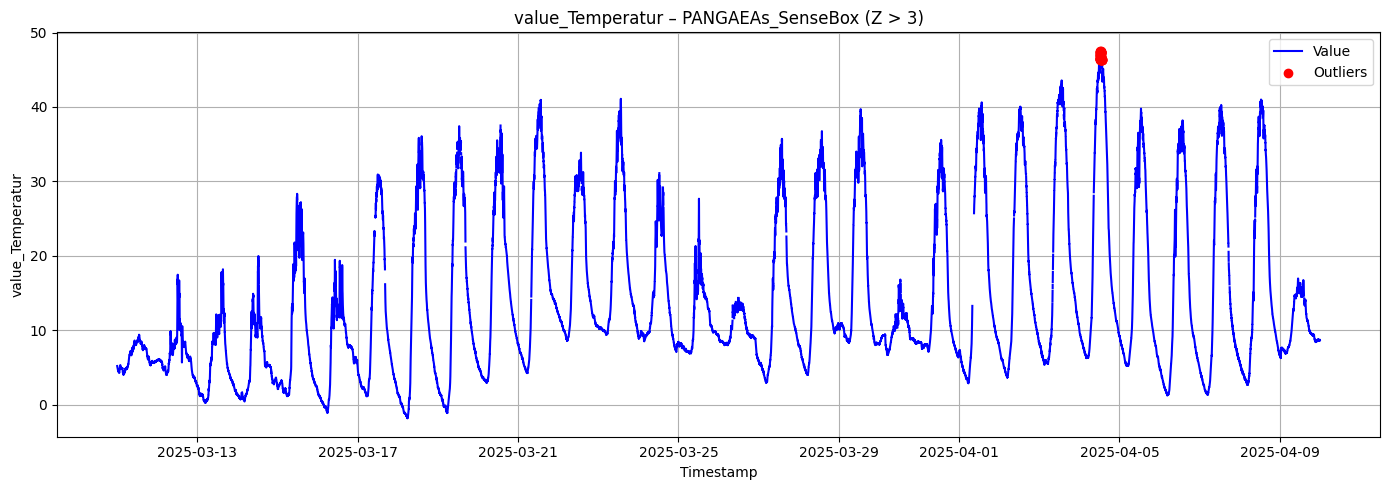

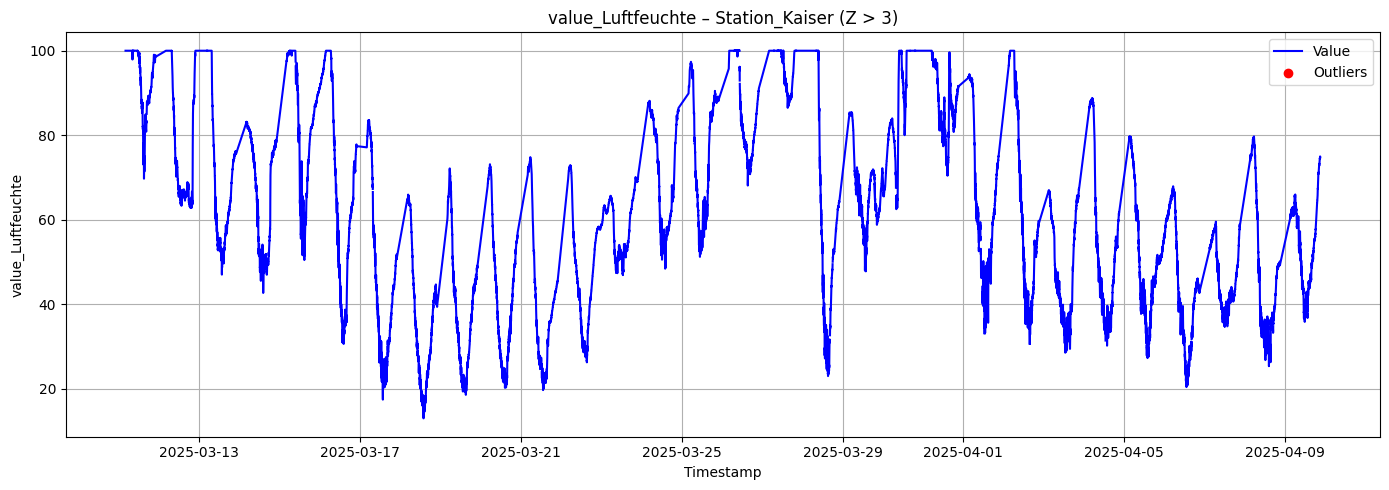

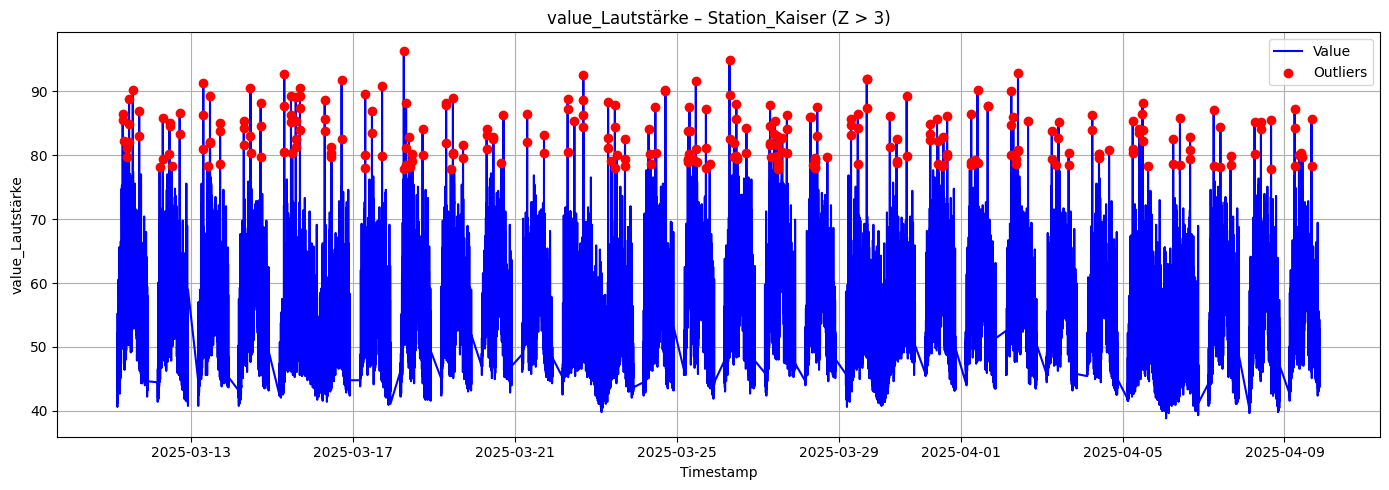

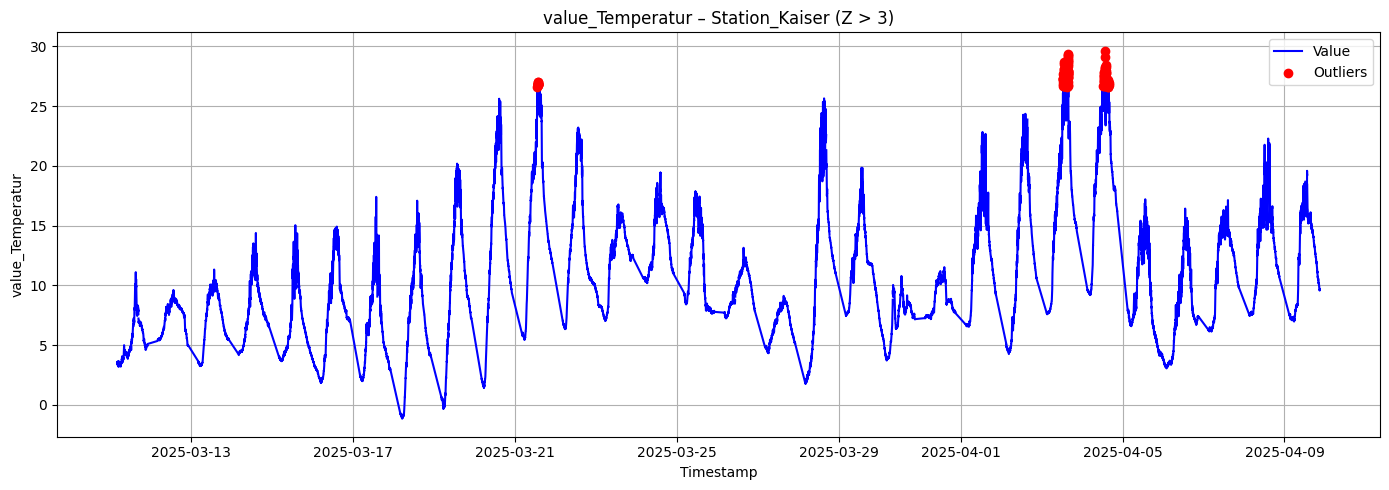

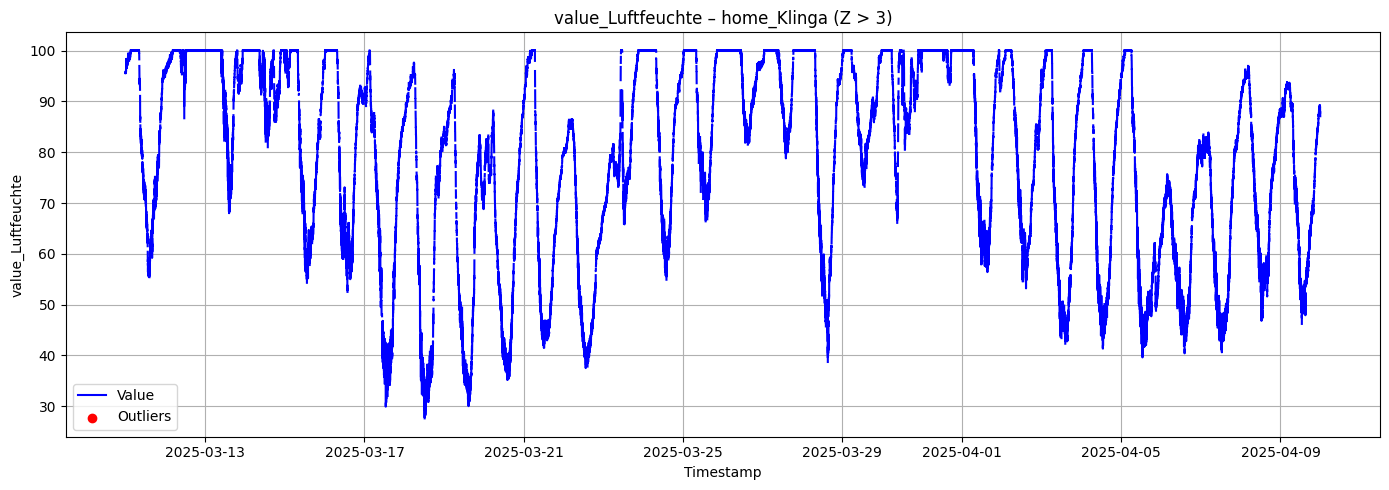

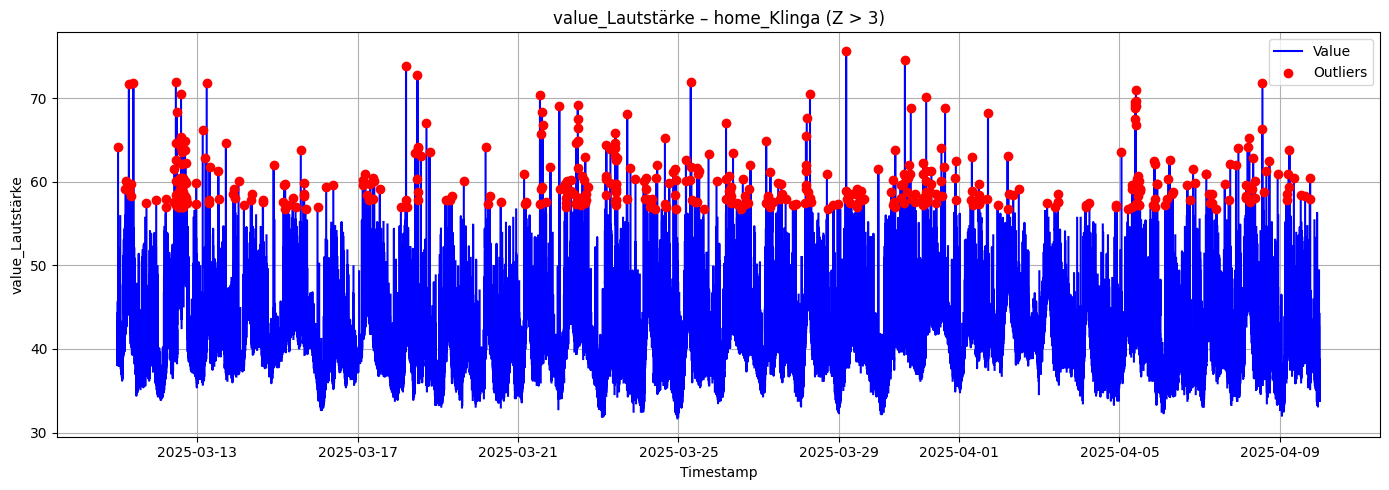

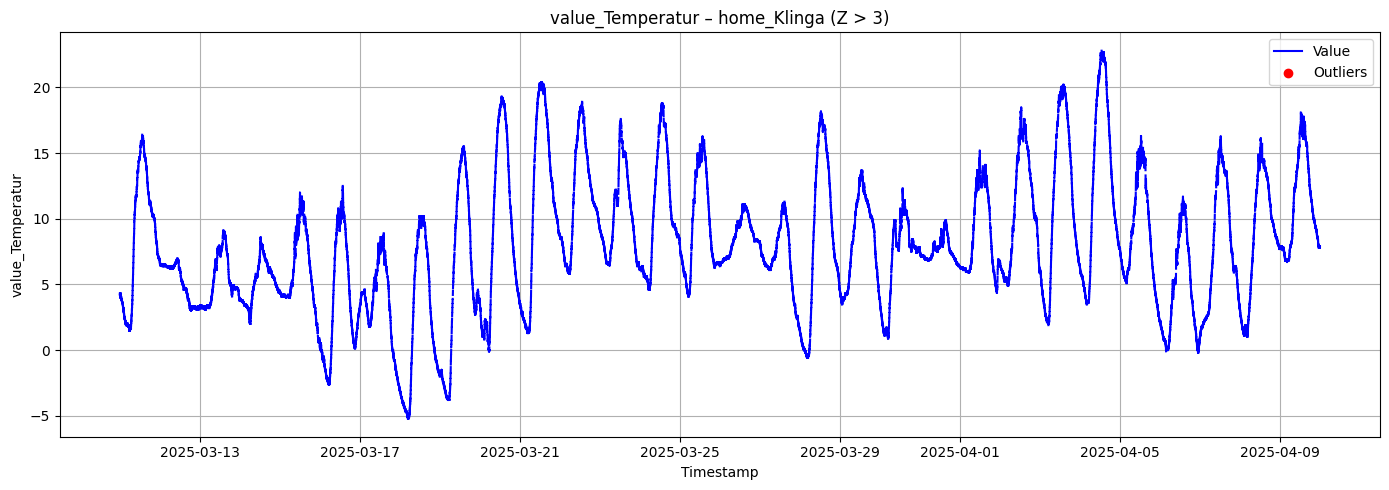

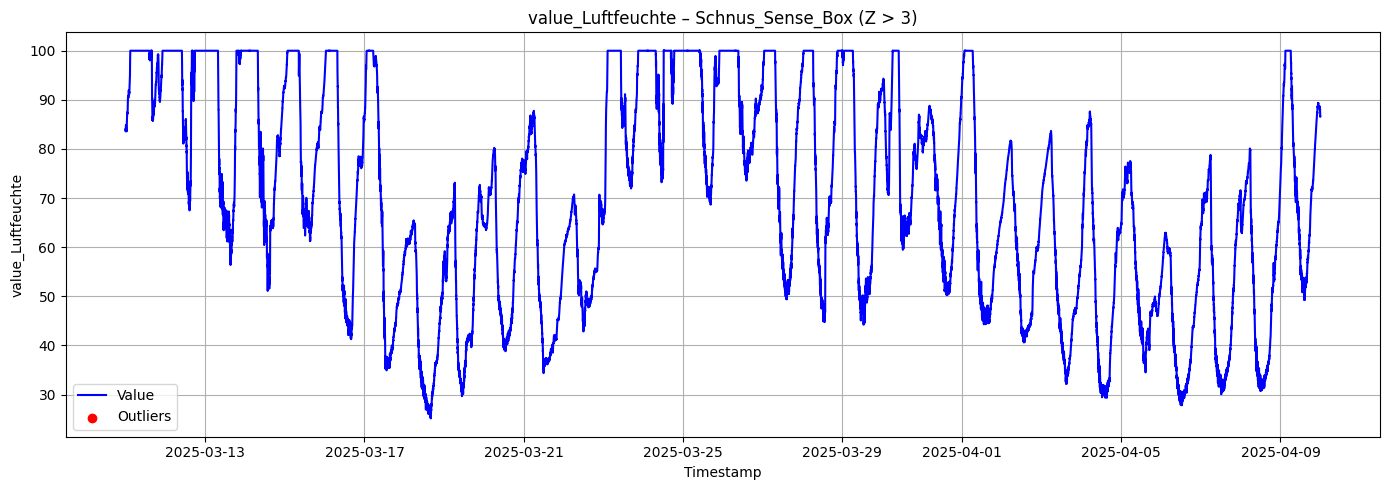

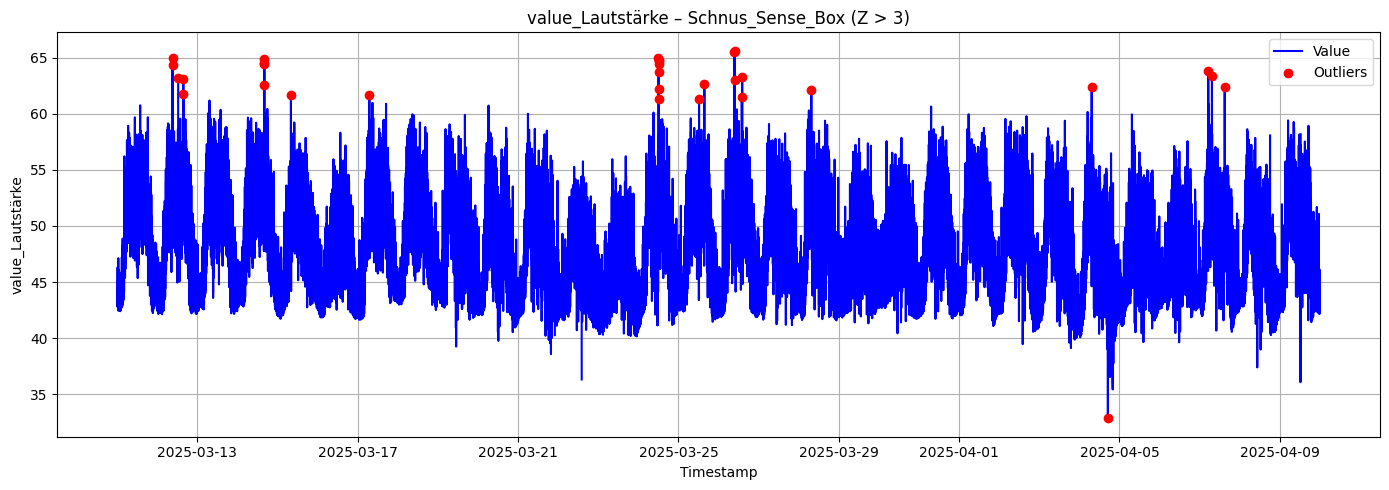

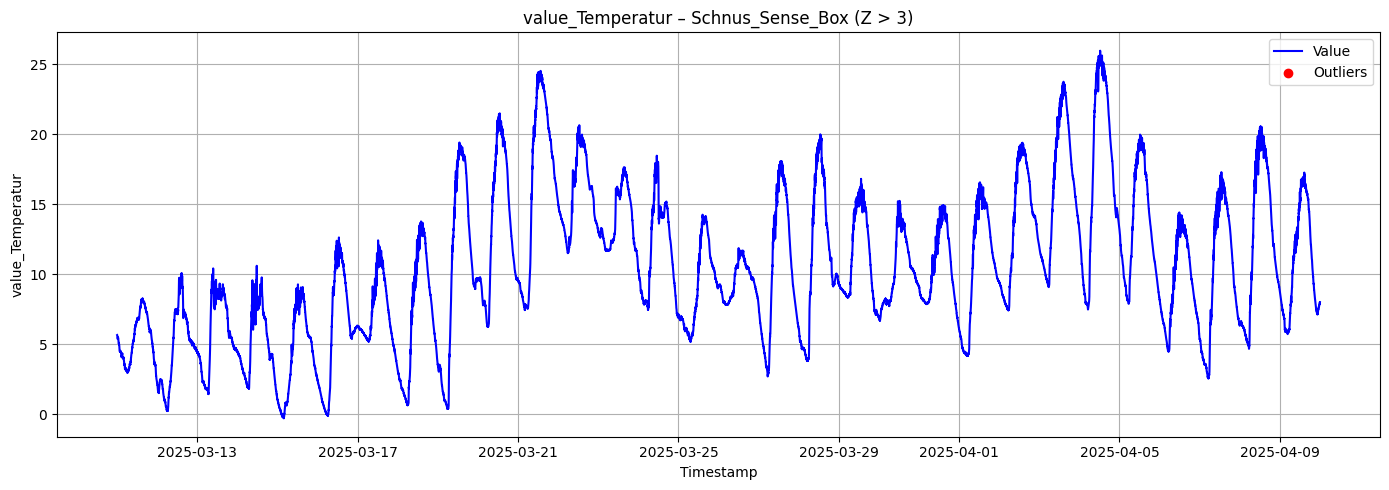

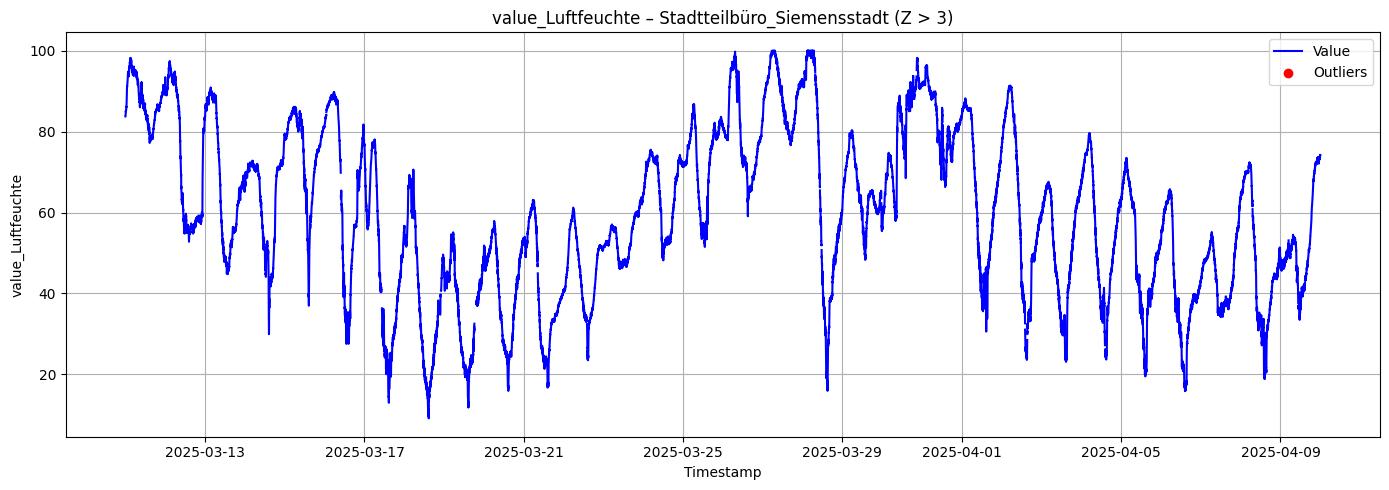

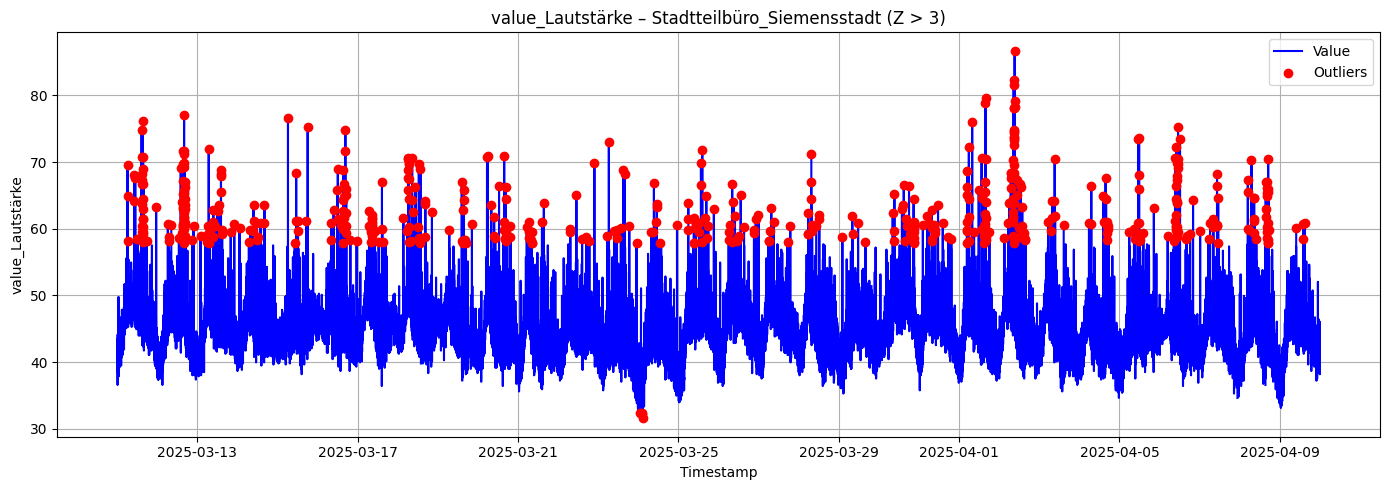

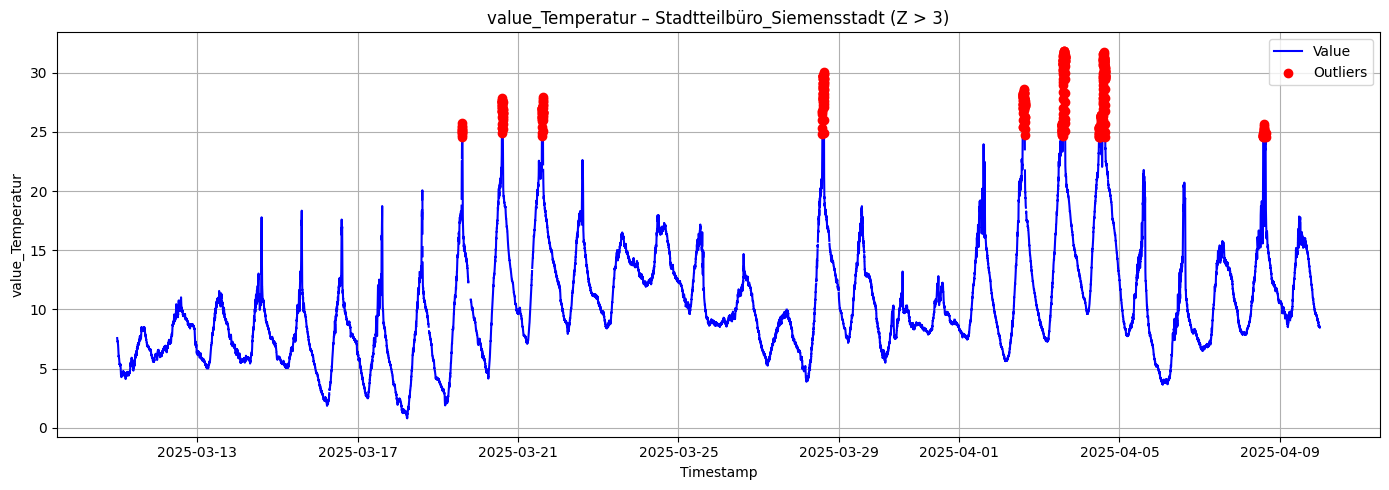

In [ ]:
z_threshold = 3  # Standard Z-score threshold

# 📈 Full time series with outlier highlighting
for name, df in dataframes.items():
    for col in sensors_to_explore:
        if col in df.columns:
            # Z-score calculation
            col_mean = df[col].mean()
            col_std = df[col].std()
            z_scores = (df[col] - col_mean) / col_std
            outliers = z_scores.abs() > z_threshold

            # Plotting
            plt.figure(figsize=(14, 5))
            plt.plot(df.index, df[col], label='Value', color='blue')
            plt.scatter(df.index[outliers], df[col][outliers], color='red', label='Outliers', zorder=5)
            plt.title(f"{col} – {name} (Z > {z_threshold})")
            plt.xlabel("Timestamp")
            plt.ylabel(col)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

## Rolling Standard Deviation
- slide window over data and calculate std at each step


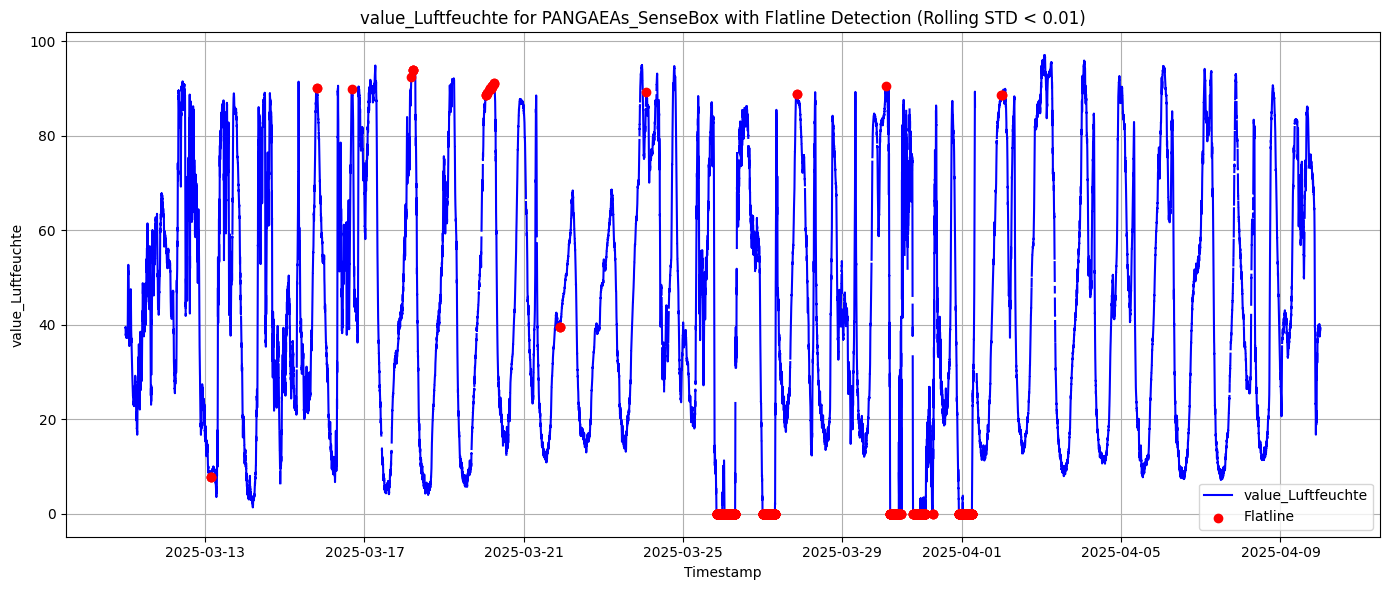

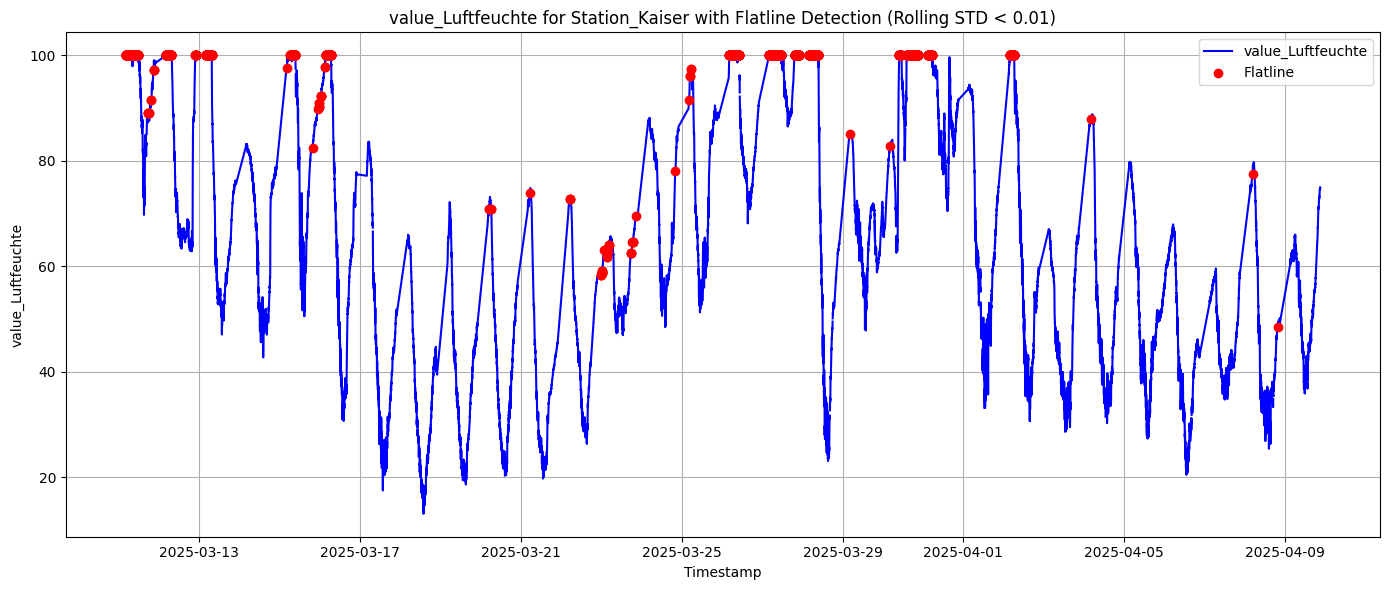

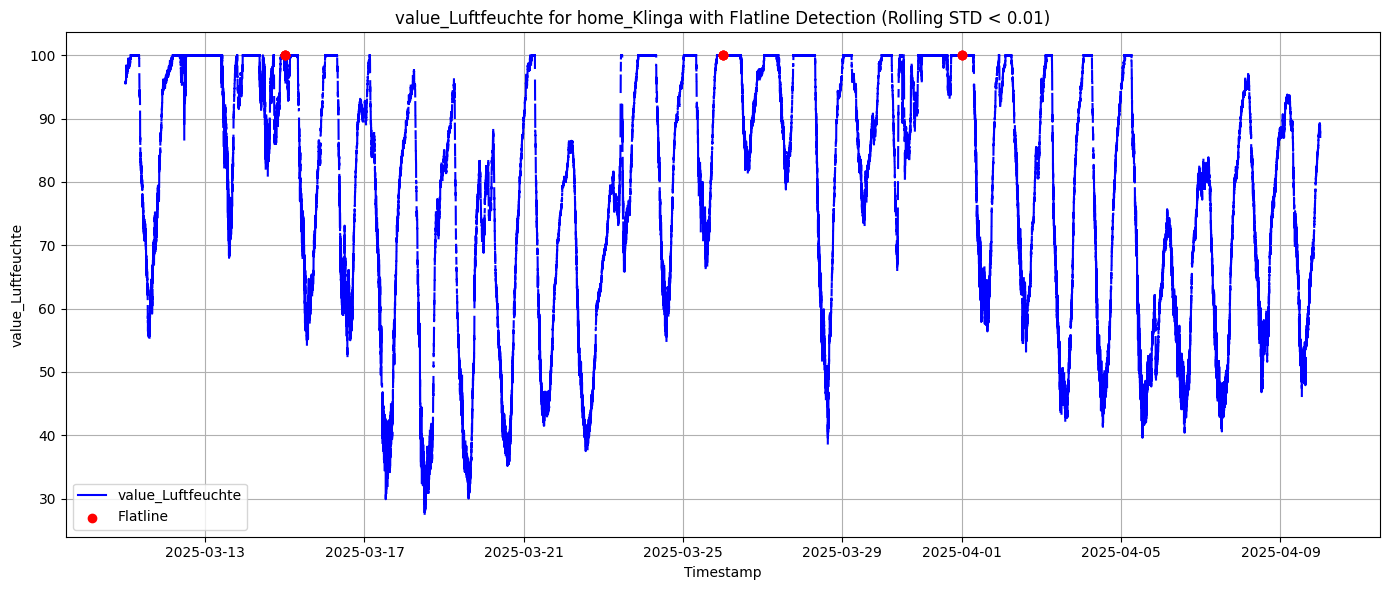

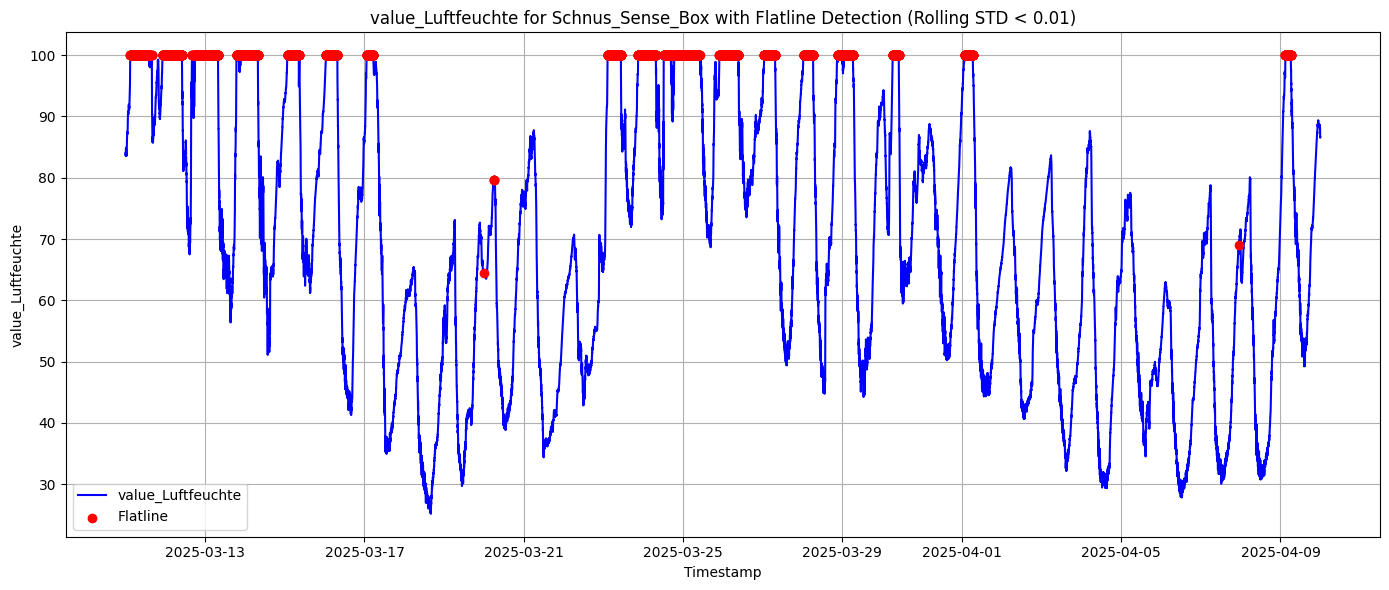

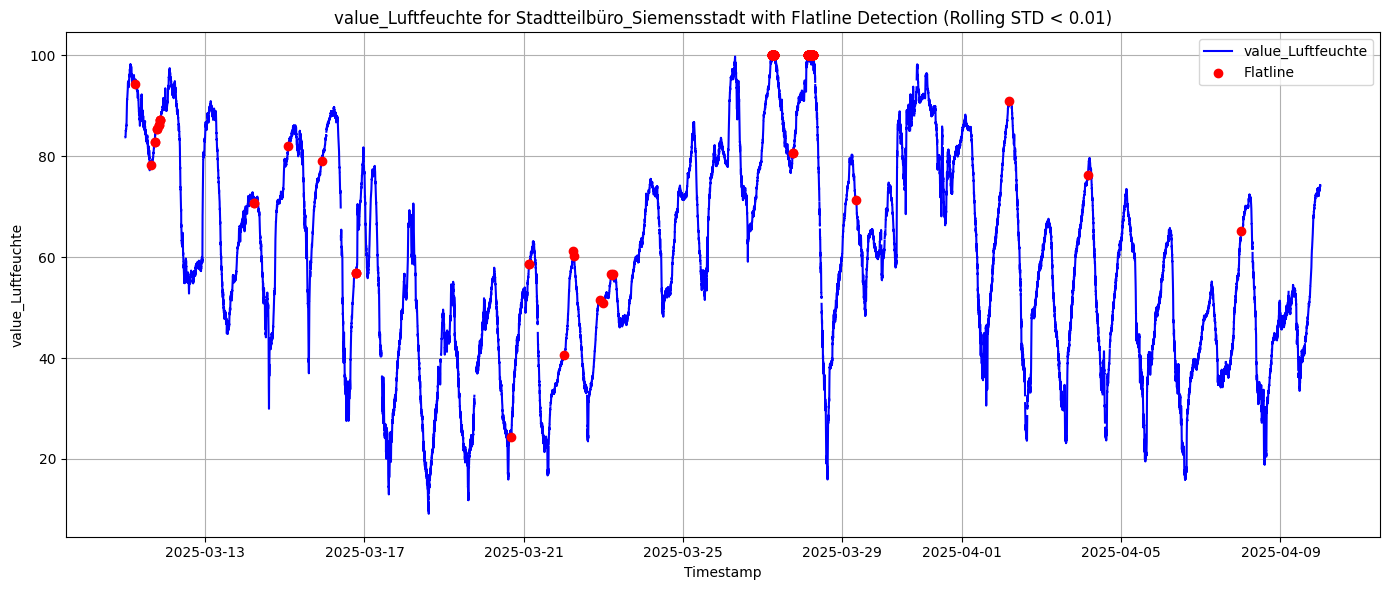

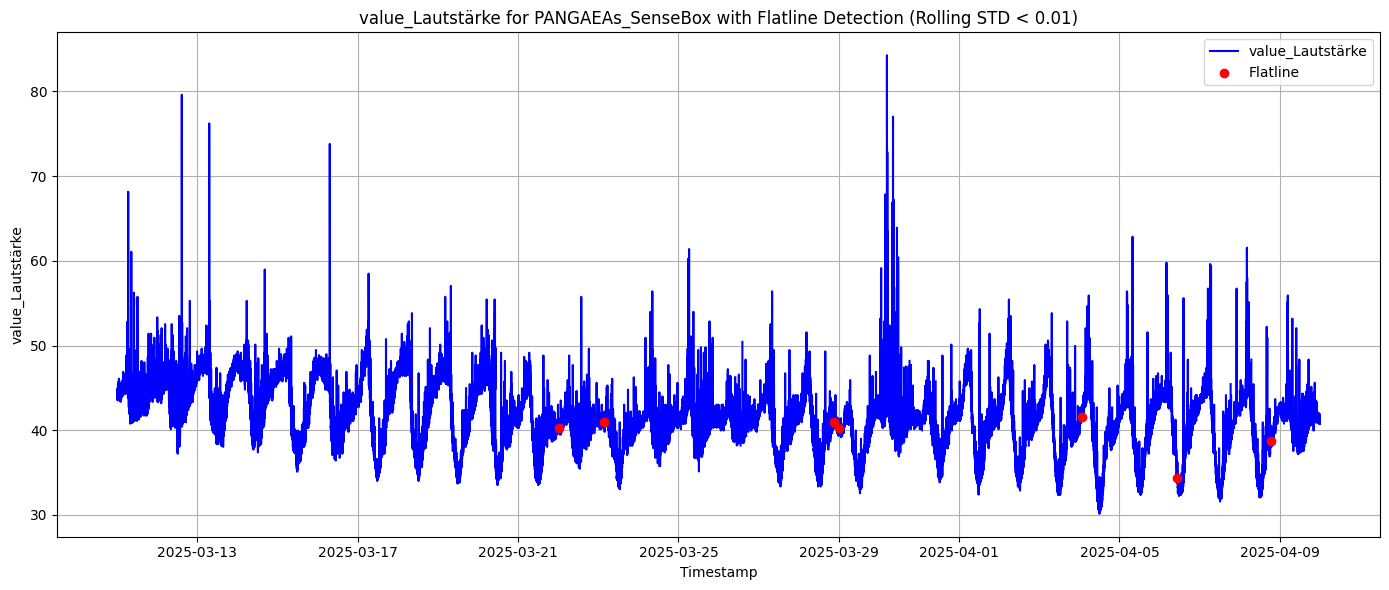

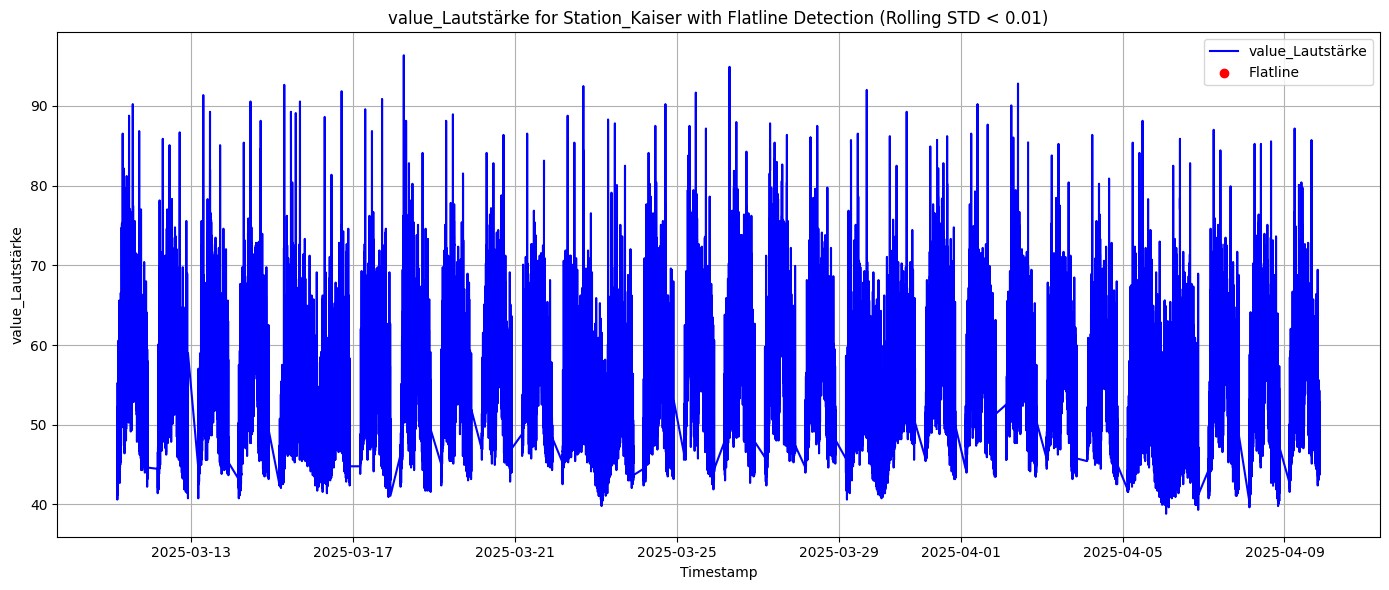

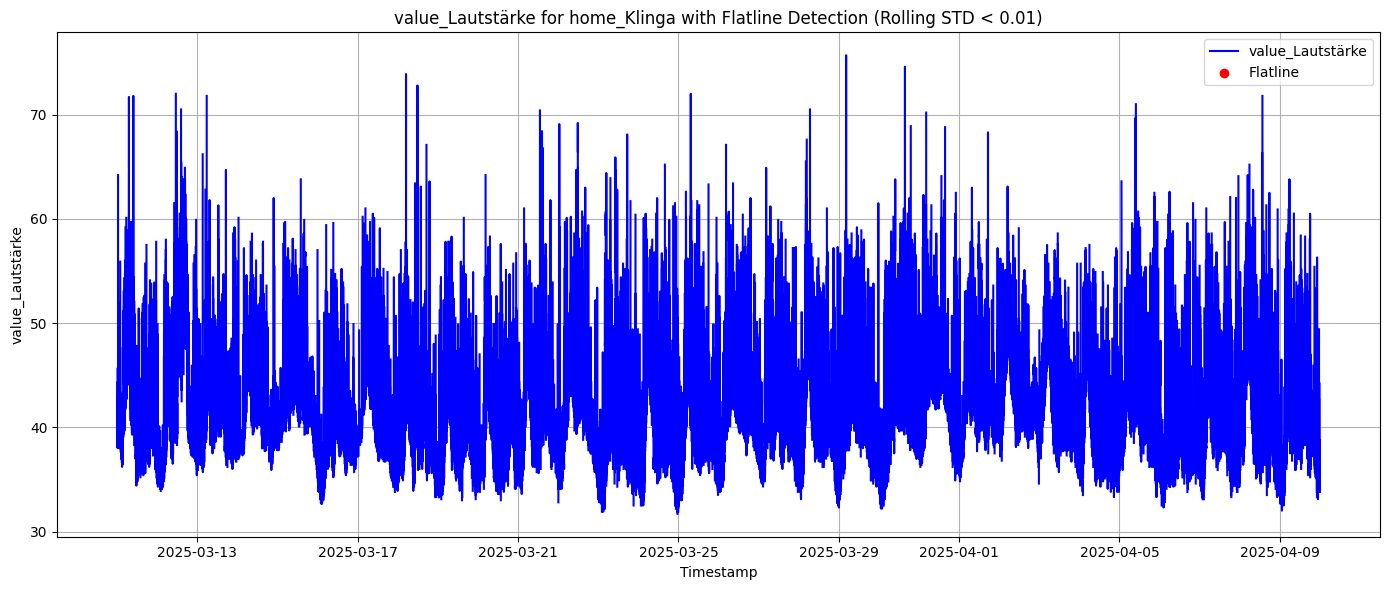

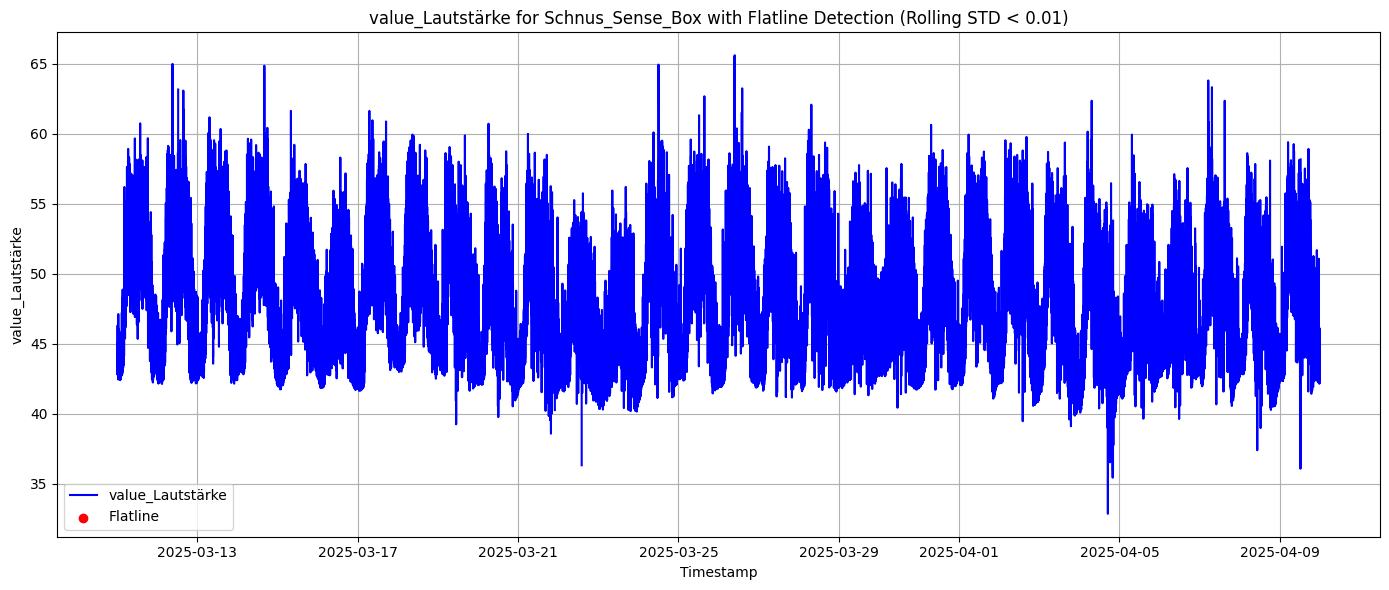

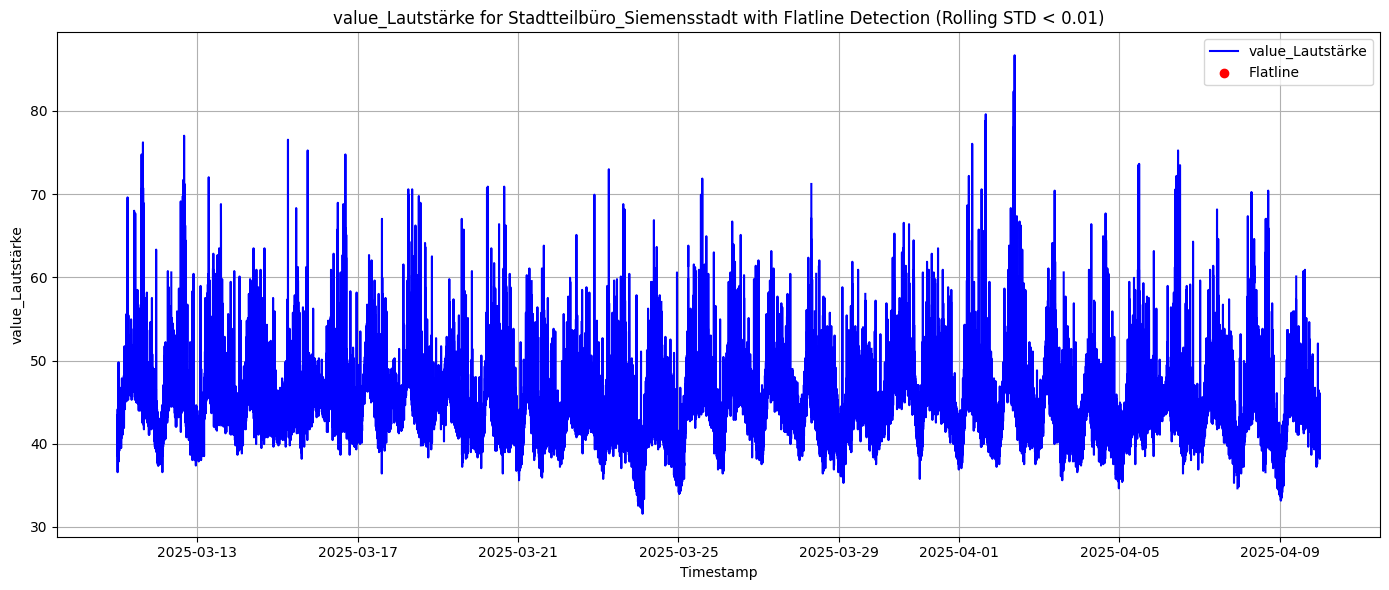

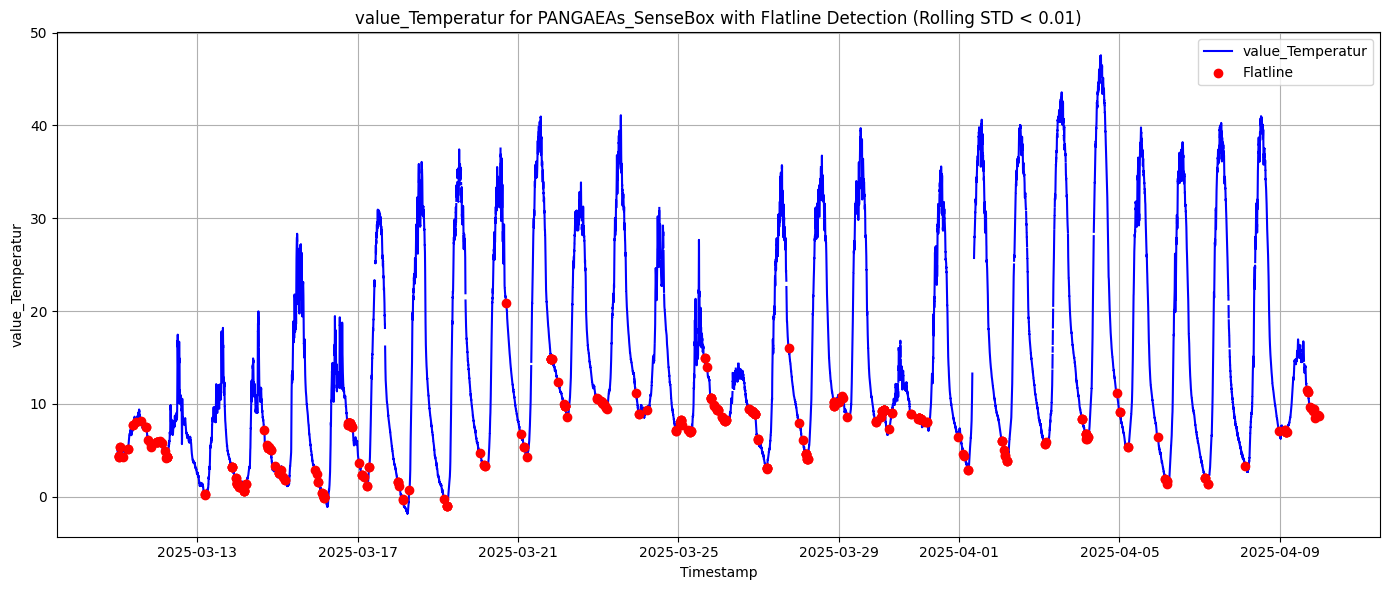

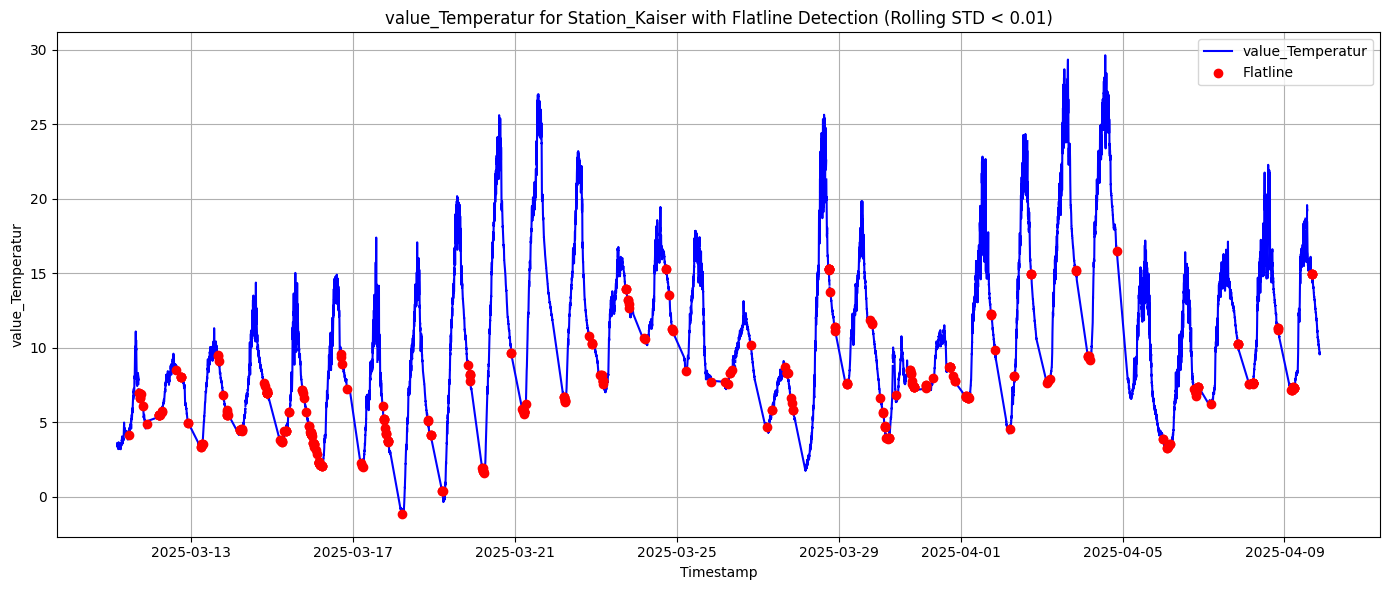

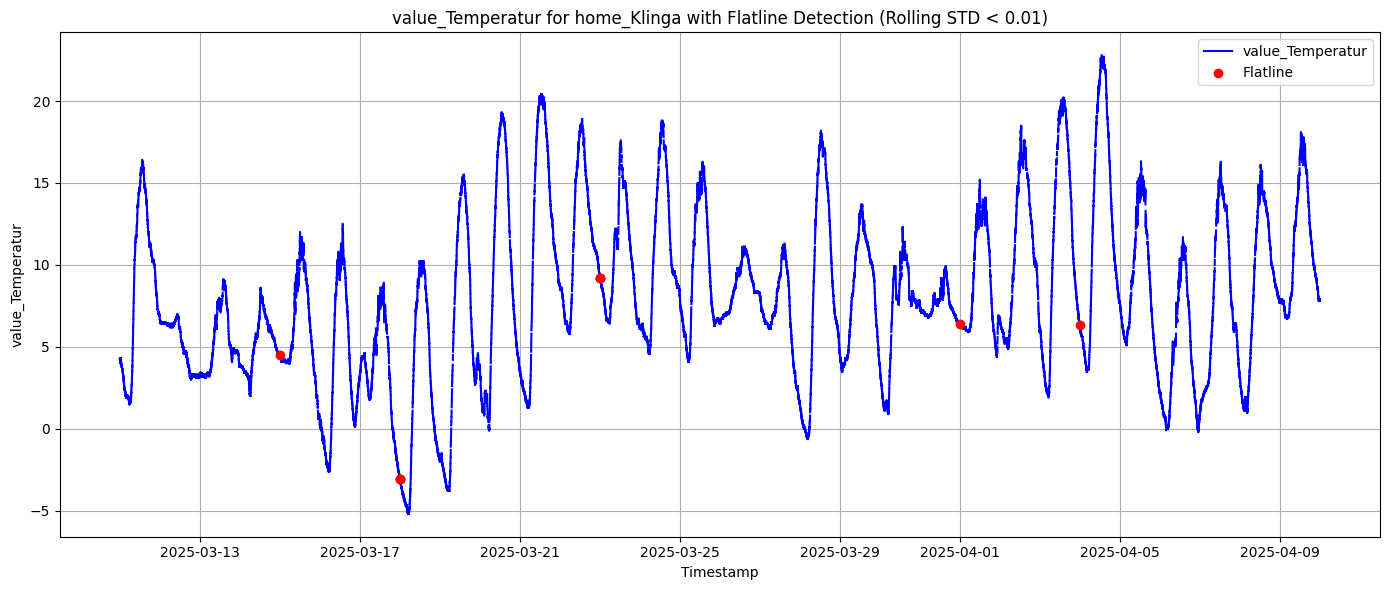

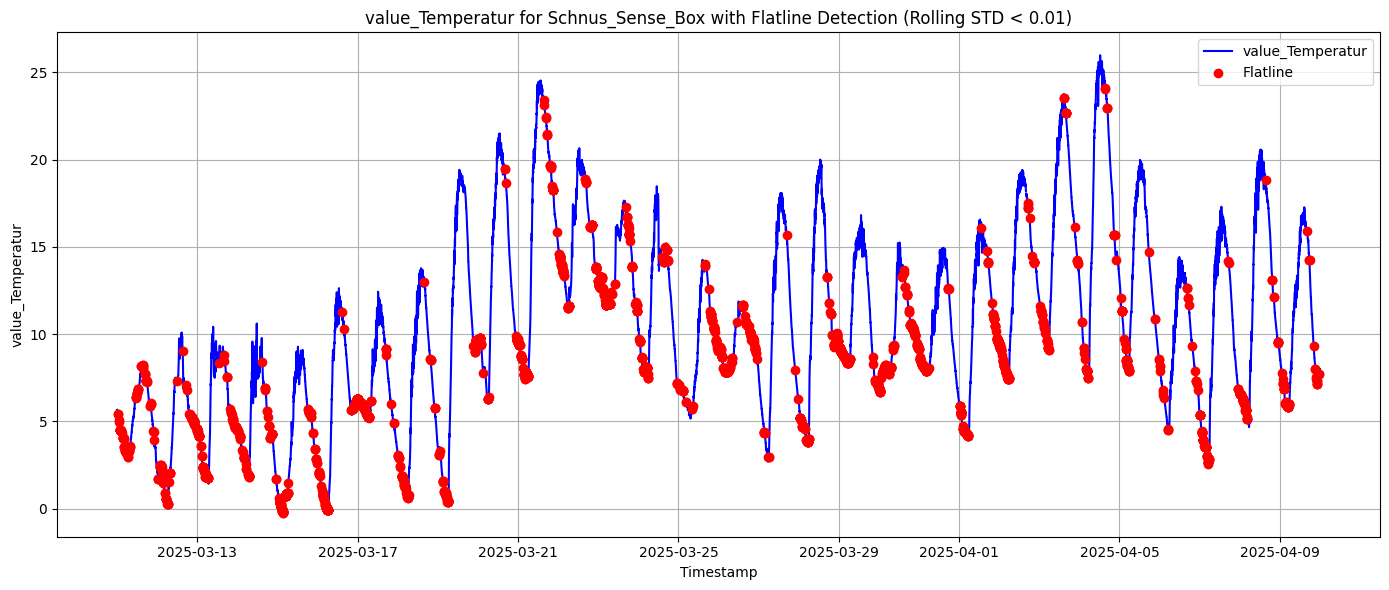

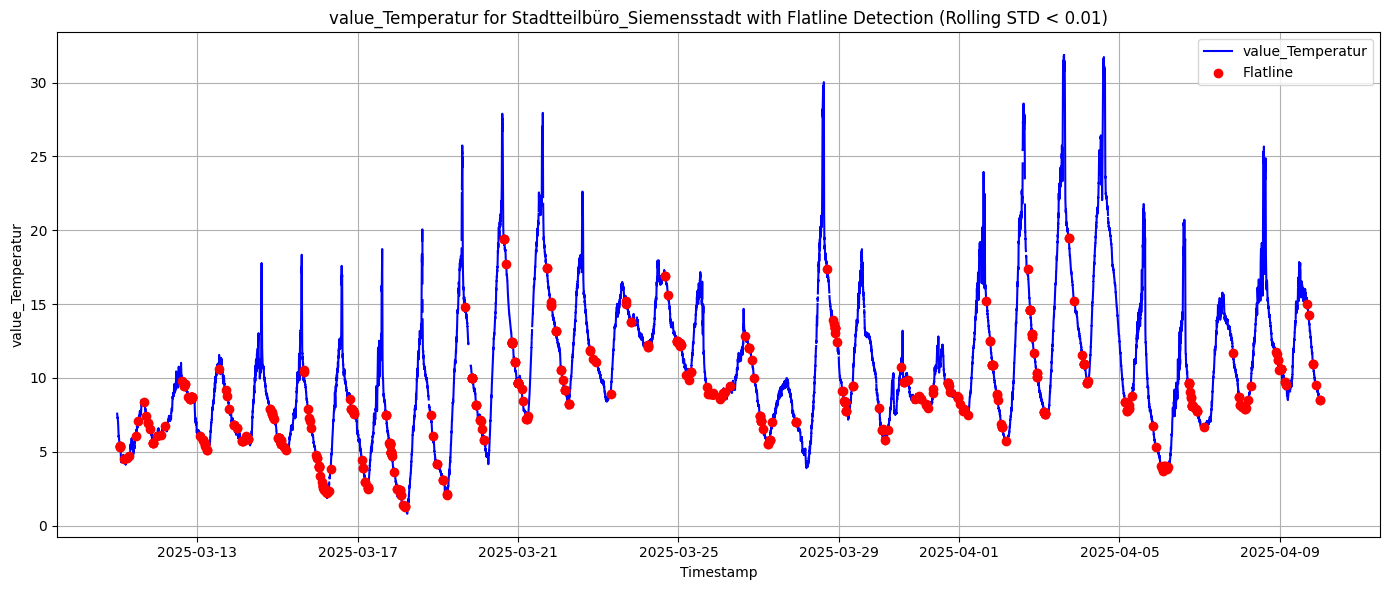

In [ ]:
for sensor in sensors_to_explore:
    for name, df in dataframes.items():
    # if sensor in df.columns:
        
        # sensor = "value_Temperatur"  
        window_size = 6

        # df = dataframes["Stadtteilbüro_Siemensstadt"].copy()

        df["rolling_std"] = df[sensor].rolling(window=window_size).std()

        threshold = 0.01
        flatline_mask = df["rolling_std"] < threshold

        plt.figure(figsize=(14, 6))
        plt.plot(df.index, df[sensor], label=sensor, color="blue")
        plt.scatter(df.index[flatline_mask], df[sensor][flatline_mask], color="red", label="Flatline", zorder=5)
        plt.title(f"{sensor} for {name} with Flatline Detection (Rolling STD < {threshold})")
        plt.xlabel("Timestamp")
        plt.ylabel(sensor)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()